In [3]:
# Mixed new and old data

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, Conv2DTranspose
#from keras.utils.vis_utils import plot_model
import keras.backend as K
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import random
from tensorflow.keras.models import load_model
# Set the random seeds for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)




def build_unet(input_shape,input_shape2, seed_value=42):
    
    
    # Create separate input layers for the three inputs
    input_low_geometry = Input(shape=input_shape, name='low_geometry_input')
    input_low_stream = Input(shape=input_shape2, name='low_stream_input')
    input_low_pressure = Input(shape=input_shape2, name='low_pressure_input')

    # Concatenate the three input layers to create a single input
    concatenated_input = concatenate([input_low_geometry, input_low_stream,input_low_pressure], axis=-1)
   

    # Contracting path
    conv1 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(concatenated_input )
    conv1 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv5)

    # Expanding path
    up6 = Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(conv5)
    up6 = concatenate([up6, conv4])
    conv6 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up6)
    conv6 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv6)

    up7 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up7, conv3])
    conv7 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up7)
    conv7 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv7)

    up8 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    up8 = concatenate([up8, conv2])
    conv8 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up8)
    conv8 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv8)

    up9 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    up9 = concatenate([up9, conv1])
    conv9 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up9)
    conv9 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv9)
    
    
    
    
    conv10 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv9 )
    conv10 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv10)
    pool10 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv20 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool10)
    conv20 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv20)
    pool20 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv30 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool20)
    conv30 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv30)
    pool30 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv40 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool30)
    conv40 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv40)
    pool40 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv50 = Conv2D(1024, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool40)
    conv50 = Conv2D(1024, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv50)

    # Expanding path
    up60 = Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(conv5)
    up60 = concatenate([up60, conv40])
    conv60 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up60)
    conv60 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv60)

    up70 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    up70 = concatenate([up70, conv30])
    conv70 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up70)
    conv70 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv70)

    up80 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    up80 = concatenate([up80, conv20])
    conv80 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up80)
    conv80 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv80)

    up90 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    up90 = concatenate([up90, conv10])
    conv90 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up90)
    conv90 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv90)    
    
    
    
    conv100 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv90 )
    conv100 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv100)
    pool100 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv200 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool100)
    conv200 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv200)
    pool200 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv300 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool200)
    conv300 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv300)
    pool300 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv400 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool300)
    conv400 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv400)
    pool400 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv500 = Conv2D(1024, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool400)
    conv500 = Conv2D(1024, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv500)

    # Expanding path
    up600 = Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(conv5)
    up600 = concatenate([up600, conv400])
    conv600 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up600)
    conv600 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv600)

    up700 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    up700 = concatenate([up700, conv300])
    conv700 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up700)
    conv700 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv700)

    up800 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    up800 = concatenate([up800, conv200])
    conv800 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up800)
    conv800 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv800)

    up900 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    up900 = concatenate([up900, conv100])
    up900 = concatenate([up900, conv90])
    up900 = concatenate([up900, conv9])
    conv900 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up900)
    conv900 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv900)
    conv900 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv900)
    
    # Velocity output layer
    velocity_outputs = Conv2D(1, 1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), name='velocity_output')(conv900)

    # Pressure output layer
    pressure_outputs = Conv2D(1, 1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), name='pressure_output')(conv900)

    model = Model(inputs=[input_low_geometry,input_low_stream,input_low_pressure], outputs=[pressure_outputs, velocity_outputs])
    return model

def boundary_loss(y_true, y_pred):
    # Extract velocity and pressure from predictions and true values
    velocity_pred = y_pred[0]
    pressure_pred = y_pred[1]
    velocity_true = y_true[0]
    pressure_true = y_true[1]
    
    # Compute max and min values for velocity and pressure
    velocity_pred_max = tf.reduce_max(velocity_pred)
    velocity_pred_min = tf.reduce_min(velocity_pred)
    velocity_true_max = tf.reduce_max(velocity_true)
    velocity_true_min = tf.reduce_min(velocity_true)
    
    pressure_pred_max = tf.reduce_max(pressure_pred)
    pressure_pred_min = tf.reduce_min(pressure_pred)
    pressure_true_max = tf.reduce_max(pressure_true)
    pressure_true_min = tf.reduce_min(pressure_true)
    
    # Compute residuals for max and min values
    velocity_residual = tf.square(velocity_pred_max - velocity_true_max) + tf.square(velocity_pred_min - velocity_true_min)
    pressure_residual = tf.square(pressure_pred_max - pressure_true_max) + tf.square(pressure_pred_min - pressure_true_min)
    
    # Total loss as the sum of residuals
    tloss = (velocity_residual + pressure_residual)/2
    
    return tloss


def data_loss(y_true, y_pred):
    y_true = tf.expand_dims(y_true, axis=-1)
    y_pred = tf.expand_dims(y_pred, axis=-1)
    # Data loss function for velocity and pressure
    d_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    return d_loss





def physical_loss(y_true, y_pred):
    
    # Extract velocity and pressure from predictions and true values
    velocity_pred = y_pred[0]
    pressure_pred = y_pred[1]
    velocity_true = y_true[0]
    pressure_true = y_true[1]
    
    
    # Convert the numpy array to a TensorFlow tensor
    velocity_true = tf.convert_to_tensor(velocity_true, dtype=tf.float32)
    pressure_true = tf.convert_to_tensor(pressure_true, dtype=tf.float32)
    
    
    
    velocity_true = tf.expand_dims(velocity_true, axis=-1)
    pressure_true = tf.expand_dims(pressure_true, axis=-1)
    
    velocity_true = tf.expand_dims(velocity_true, axis=0)
    pressure_true = tf.expand_dims(pressure_true, axis=0)
    
    
    velocity_pred = tf.expand_dims(velocity_pred, axis=-1)
    pressure_pred = tf.expand_dims(pressure_pred, axis=-1)

    velocity_pred = tf.expand_dims(velocity_pred, axis=0)
    pressure_pred = tf.expand_dims(pressure_pred, axis=0)

    

    # Compute gradients
    velocity_gradients_pred = tf.image.image_gradients(velocity_pred)
    pressure_gradients_pred = tf.image.image_gradients(pressure_pred)
    velocity_gradients_true = tf.image.image_gradients(velocity_true)
    pressure_gradients_true = tf.image.image_gradients(pressure_true)

    # Compute divergence of velocity (for continuity equation)
    divergence_velocity_pred = velocity_gradients_pred[0] + velocity_gradients_pred[1]
    divergence_velocity_true = velocity_gradients_true[0] + velocity_gradients_true[1]
    
    divergence_pressure_pred = pressure_gradients_pred[0]+ pressure_gradients_pred[1]
    divergence_pressure_true = pressure_gradients_true[0] + pressure_gradients_true[1]


    # Compute the convective term (u · ∇)u for predicted and true velocity
    convective_term_pred = (
        velocity_pred[0] * velocity_gradients_pred[0] + 
        velocity_pred[0] * velocity_gradients_pred[1]
    )
    convective_term_true = (
        velocity_true[0] * velocity_gradients_true[0] + 
        velocity_true[0] * velocity_gradients_true[1]
    )

    # Compute the viscous term μ∇²u (Laplacian of velocity) for predicted and true velocity
    viscous_term_pred =  (
        tf.image.image_gradients(velocity_gradients_pred[0]) + 
        tf.image.image_gradients(velocity_gradients_pred[1])
    )
    viscous_term_true =  (
        tf.image.image_gradients(velocity_gradients_true[0]) + 
        tf.image.image_gradients(velocity_gradients_true[1])
    )

    # Compute the pressure gradient term ∇p for predicted and true pressure
    pressure_gradient_pred = tf.concat(pressure_gradients_pred, axis=-1)
    pressure_gradient_true = tf.concat(pressure_gradients_true, axis=-1)

    # Compute the momentum residual for predicted and true values
    momentum_residual_pred = (
        convective_term_pred - 
        pressure_gradient_pred + 
        viscous_term_pred
    )
    momentum_residual_true = (
        convective_term_true - 
        pressure_gradient_true + 
        viscous_term_true
    )
    
    
    

    # Compute the L2 norm of the momentum residual
    momentum_residual_norm = tf.reduce_mean(tf.square(momentum_residual_pred - momentum_residual_true))

    # Compute the L2 norm of the continuity residual
    continuity_residual_norm = tf.reduce_mean(tf.square(divergence_velocity_pred - divergence_velocity_true))

    # Total physical loss is the sum of momentum and continuity residuals
    physical_loss_value = 0.2*momentum_residual_norm +continuity_residual_norm

    return physical_loss_value

    
    



def total_loss(y_true, y_pred):
    # You can customize the weighting of the data loss and physical loss here
    weight_boundary_loss = 0.02
    weight_data_loss = 0.08
    weight_physical_loss = 0.9
    phy=physical_loss(y_true, y_pred)

    # Calculate the total loss as a combination of data loss and physical loss
    total_loss = (weight_data_loss * data_loss(y_true, y_pred) )+(weight_physical_loss * phy ) + (weight_boundary_loss * boundary_loss(y_true, y_pred) )
    return total_loss
     





#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# Train the model with your dataset
import os
import numpy as np
from PIL import Image
from keras.callbacks import ModelCheckpoint



lv_folder = 'Low/LVV-new'
hv_folder = 'High/HVV'
lp_folder = 'Low/LPP-new'
hp_folder = 'High/HPP'
lg_folder = 'LG-3C'

# Get the list of file names in each folder
lv_files = [f for f in os.listdir(lv_folder) if f != ".ipynb_checkpoints"]
hv_files = [f for f in os.listdir(hv_folder) if f != ".ipynb_checkpoints"]
lp_files = [f for f in os.listdir(lp_folder) if f != ".ipynb_checkpoints"]
hp_files = [f for f in os.listdir(hp_folder) if f != ".ipynb_checkpoints"]
lg_files = [f for f in os.listdir(lg_folder) if f != ".ipynb_checkpoints"]

# Sort the file names to ensure the order is consistent
lv_files.sort()
hv_files.sort()
lp_files.sort()
hp_files.sort()
lg_files.sort()


# Set the input shape
input_shape = (256, 256, 3)  # Update to 3 channels for color images
input_shape2 = (256, 256, 1)

# Create empty lists to store the data
X_lv = []
X_lp = []
X_lg = []
Y_hv = []
Y_hp = []

# Read the data from the folders
for lv_file, hv_file,lp_file,hp_file,lg_file in zip(lv_files, hv_files,lp_files,hp_files,lg_files):
    try:
        
        # Read the LFV
        lv_image = np.load(os.path.join(lv_folder, lv_file))  # Convert to RGB
        X_lv.append(np.array(lv_image))
        
        # Read the HFV
        hv_image = np.load(os.path.join(hv_folder, hv_file))  # Convert to RGB
        Y_hv.append(np.array(hv_image))

        # Read the LFP
        lp_image = np.load(os.path.join(lp_folder, lp_file))  # Convert to RGB
        X_lp.append(np.array(lp_image))
    
    
        # Read the channel geometry image
        lg_image = Image.open(os.path.join(lg_folder, lg_file)).convert('RGB')  # Convert to RGB
        lg_image = lg_image.resize(input_shape[:2])  # Resize the image
        X_lg.append(np.array(lg_image))
    
        # Read the HFP
        hp_image = np.load(os.path.join(hp_folder, hp_file))  # Convert to RGB
        Y_hp.append(np.array(hp_image))
    except:
        print('')

        
        
# Convert the lists to arrays
X_lv = np.array(X_lv) 
X_lp = np.array(X_lp) 
X_lg = np.array(X_lg) / 255.0  # Normalize the channel geometry images
Y_hv = np.array(Y_hv)
Y_hp = np.array(Y_hp)




X_lp[np.isnan(X_lp)] = 0
X_lv[np.isnan(X_lv)] = 0
Y_hp[np.isnan(Y_hp)] = 0
Y_hv[np.isnan(Y_hv)] = 0

Y_hpt=(Y_hp-np.min(Y_hp))/(np.max(Y_hp)-np.min(Y_hp))
X_lpt=(X_lp-np.min(X_lp))/(np.max(X_lp)-np.min(X_lp))




# Build the U-Net model
model = build_unet(input_shape,input_shape2)



optim = Adam(learning_rate=0.00001)
# Compile the model with the desired loss functions
model.compile(optimizer=optim,
              loss=[total_loss,total_loss])
# Set up checkpoints to save the best model during training
checkpoint_path = 'Saved_Models_Temp/total-proposed-Unet-3-Inputs.h5'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# Train the model
epochs = 2400
batch_size = 16
print('start fitting')
model.fit([X_lg,X_lv,X_lpt], [Y_hpt, Y_hv],
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          callbacks=[checkpoint])


2025-03-06 23:42:18.386488: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2025-03-06 23:42:18.386510: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2025-03-06 23:42:18.386515: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
2025-03-06 23:42:18.386541: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-06 23:42:18.386554: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


start fitting
Epoch 1/2400


2025-03-06 23:42:21.726926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


142/142 [==============================] - ETA: 0s - loss: 0.0250 - pressure_output_loss: 0.0095 - velocity_output_loss: 0.0155

2025-03-06 23:44:31.995401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 0.00612, saving model to Saved_Models/total-proposed-Unet-3-Inputs.h5


/Users/trina-mrd-lab2/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


142/142 [==============================] - 141s 983ms/step - loss: 0.0250 - pressure_output_loss: 0.0095 - velocity_output_loss: 0.0155 - val_loss: 0.0061 - val_pressure_output_loss: 0.0028 - val_velocity_output_loss: 0.0033
Epoch 2/2400
142/142 [==============================] - ETA: 0s - loss: 0.0040 - pressure_output_loss: 0.0022 - velocity_output_loss: 0.0017
Epoch 2: val_loss improved from 0.00612 to 0.00446, saving model to Saved_Models/total-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 138s 973ms/step - loss: 0.0040 - pressure_output_loss: 0.0022 - velocity_output_loss: 0.0017 - val_loss: 0.0045 - val_pressure_output_loss: 0.0020 - val_velocity_output_loss: 0.0025
Epoch 3/2400
142/142 [==============================] - ETA: 0s - loss: 0.0024 - pressure_output_loss: 0.0014 - velocity_output_loss: 0.0010
Epoch 3: val_loss improved from 0.00446 to 0.00231, saving model to Saved_Models/total-proposed-Unet-3-Inputs.h5
142/142 [==============================] -

142/142 [==============================] - 152s 1s/step - loss: 8.2556e-04 - pressure_output_loss: 2.8197e-04 - velocity_output_loss: 5.4359e-04 - val_loss: 4.7189e-04 - val_pressure_output_loss: 1.7152e-04 - val_velocity_output_loss: 3.0037e-04
Epoch 19/2400
142/142 [==============================] - ETA: 0s - loss: 8.3071e-04 - pressure_output_loss: 2.8628e-04 - velocity_output_loss: 5.4444e-04
Epoch 19: val_loss did not improve from 0.00047
142/142 [==============================] - 153s 1s/step - loss: 8.3071e-04 - pressure_output_loss: 2.8628e-04 - velocity_output_loss: 5.4444e-04 - val_loss: 5.1184e-04 - val_pressure_output_loss: 1.9892e-04 - val_velocity_output_loss: 3.1292e-04
Epoch 20/2400
142/142 [==============================] - ETA: 0s - loss: 8.2524e-04 - pressure_output_loss: 2.7987e-04 - velocity_output_loss: 5.4537e-04
Epoch 20: val_loss improved from 0.00047 to 0.00042, saving model to Saved_Models/total-proposed-Unet-3-Inputs.h5
142/142 [=============================

142/142 [==============================] - 158s 1s/step - loss: 6.1190e-04 - pressure_output_loss: 2.0244e-04 - velocity_output_loss: 4.0946e-04 - val_loss: 1.6089e-04 - val_pressure_output_loss: 7.4085e-05 - val_velocity_output_loss: 8.6805e-05
Epoch 36/2400
142/142 [==============================] - ETA: 0s - loss: 6.0948e-04 - pressure_output_loss: 1.9490e-04 - velocity_output_loss: 4.1458e-04
Epoch 36: val_loss improved from 0.00016 to 0.00015, saving model to Saved_Models/total-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 155s 1s/step - loss: 6.0948e-04 - pressure_output_loss: 1.9490e-04 - velocity_output_loss: 4.1458e-04 - val_loss: 1.5401e-04 - val_pressure_output_loss: 6.7622e-05 - val_velocity_output_loss: 8.6388e-05
Epoch 37/2400
142/142 [==============================] - ETA: 0s - loss: 5.8715e-04 - pressure_output_loss: 1.8048e-04 - velocity_output_loss: 4.0667e-04
Epoch 37: val_loss did not improve from 0.00015
142/142 [=============================

142/142 [==============================] - ETA: 0s - loss: 4.3493e-04 - pressure_output_loss: 9.5197e-05 - velocity_output_loss: 3.3973e-04
Epoch 53: val_loss improved from 0.00014 to 0.00013, saving model to Saved_Models/total-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 158s 1s/step - loss: 4.3493e-04 - pressure_output_loss: 9.5197e-05 - velocity_output_loss: 3.3973e-04 - val_loss: 1.3288e-04 - val_pressure_output_loss: 6.1518e-05 - val_velocity_output_loss: 7.1358e-05
Epoch 54/2400
142/142 [==============================] - ETA: 0s - loss: 4.6818e-04 - pressure_output_loss: 1.0776e-04 - velocity_output_loss: 3.6042e-04
Epoch 54: val_loss did not improve from 0.00013
142/142 [==============================] - 156s 1s/step - loss: 4.6818e-04 - pressure_output_loss: 1.0776e-04 - velocity_output_loss: 3.6042e-04 - val_loss: 1.3628e-04 - val_pressure_output_loss: 6.5214e-05 - val_velocity_output_loss: 7.1066e-05
Epoch 55/2400
142/142 [=============================

142/142 [==============================] - ETA: 0s - loss: 3.9584e-04 - pressure_output_loss: 7.2168e-05 - velocity_output_loss: 3.2367e-04
Epoch 70: val_loss improved from 0.00011 to 0.00010, saving model to Saved_Models/total-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 149s 1s/step - loss: 3.9584e-04 - pressure_output_loss: 7.2168e-05 - velocity_output_loss: 3.2367e-04 - val_loss: 1.0385e-04 - val_pressure_output_loss: 4.5523e-05 - val_velocity_output_loss: 5.8329e-05
Epoch 71/2400
142/142 [==============================] - ETA: 0s - loss: 3.6474e-04 - pressure_output_loss: 7.1537e-05 - velocity_output_loss: 2.9321e-04
Epoch 71: val_loss did not improve from 0.00010
142/142 [==============================] - 149s 1s/step - loss: 3.6474e-04 - pressure_output_loss: 7.1537e-05 - velocity_output_loss: 2.9321e-04 - val_loss: 1.1131e-04 - val_pressure_output_loss: 4.7513e-05 - val_velocity_output_loss: 6.3800e-05
Epoch 72/2400
142/142 [=============================

Epoch 88/2400
142/142 [==============================] - ETA: 0s - loss: 3.8012e-04 - pressure_output_loss: 6.6796e-05 - velocity_output_loss: 3.1332e-04
Epoch 88: val_loss improved from 0.00009 to 0.00009, saving model to Saved_Models/total-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 151s 1s/step - loss: 3.8012e-04 - pressure_output_loss: 6.6796e-05 - velocity_output_loss: 3.1332e-04 - val_loss: 8.7740e-05 - val_pressure_output_loss: 3.0105e-05 - val_velocity_output_loss: 5.7634e-05
Epoch 89/2400
142/142 [==============================] - ETA: 0s - loss: 3.4927e-04 - pressure_output_loss: 5.9295e-05 - velocity_output_loss: 2.8997e-04
Epoch 89: val_loss did not improve from 0.00009
142/142 [==============================] - 150s 1s/step - loss: 3.4927e-04 - pressure_output_loss: 5.9295e-05 - velocity_output_loss: 2.8997e-04 - val_loss: 1.2830e-04 - val_pressure_output_loss: 6.7156e-05 - val_velocity_output_loss: 6.1147e-05
Epoch 90/2400
142/142 [===============

Epoch 123/2400
142/142 [==============================] - ETA: 0s - loss: 3.4483e-04 - pressure_output_loss: 6.1331e-05 - velocity_output_loss: 2.8350e-04
Epoch 123: val_loss improved from 0.00007 to 0.00007, saving model to Saved_Models/total-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 157s 1s/step - loss: 3.4483e-04 - pressure_output_loss: 6.1331e-05 - velocity_output_loss: 2.8350e-04 - val_loss: 6.6456e-05 - val_pressure_output_loss: 1.7604e-05 - val_velocity_output_loss: 4.8852e-05
Epoch 124/2400
142/142 [==============================] - ETA: 0s - loss: 3.5628e-04 - pressure_output_loss: 5.1770e-05 - velocity_output_loss: 3.0451e-04
Epoch 124: val_loss did not improve from 0.00007
142/142 [==============================] - 154s 1s/step - loss: 3.5628e-04 - pressure_output_loss: 5.1770e-05 - velocity_output_loss: 3.0451e-04 - val_loss: 7.1583e-05 - val_pressure_output_loss: 2.0956e-05 - val_velocity_output_loss: 5.0626e-05
Epoch 125/2400
142/142 [==========

Epoch 141/2400
142/142 [==============================] - ETA: 0s - loss: 3.1174e-04 - pressure_output_loss: 4.0091e-05 - velocity_output_loss: 2.7165e-04
Epoch 141: val_loss did not improve from 0.00006
142/142 [==============================] - 150s 1s/step - loss: 3.1174e-04 - pressure_output_loss: 4.0091e-05 - velocity_output_loss: 2.7165e-04 - val_loss: 6.3539e-05 - val_pressure_output_loss: 1.2390e-05 - val_velocity_output_loss: 5.1149e-05
Epoch 142/2400
142/142 [==============================] - ETA: 0s - loss: 3.3056e-04 - pressure_output_loss: 4.8748e-05 - velocity_output_loss: 2.8181e-04
Epoch 142: val_loss did not improve from 0.00006
142/142 [==============================] - 154s 1s/step - loss: 3.3056e-04 - pressure_output_loss: 4.8748e-05 - velocity_output_loss: 2.8181e-04 - val_loss: 6.3215e-05 - val_pressure_output_loss: 1.6033e-05 - val_velocity_output_loss: 4.7182e-05
Epoch 143/2400
142/142 [==============================] - ETA: 0s - loss: 3.2363e-04 - pressure_outp

Epoch 159/2400
142/142 [==============================] - ETA: 0s - loss: 3.3045e-04 - pressure_output_loss: 4.4410e-05 - velocity_output_loss: 2.8604e-04
Epoch 159: val_loss improved from 0.00006 to 0.00006, saving model to Saved_Models/total-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 151s 1s/step - loss: 3.3045e-04 - pressure_output_loss: 4.4410e-05 - velocity_output_loss: 2.8604e-04 - val_loss: 5.9909e-05 - val_pressure_output_loss: 1.2328e-05 - val_velocity_output_loss: 4.7581e-05
Epoch 160/2400
142/142 [==============================] - ETA: 0s - loss: 2.9482e-04 - pressure_output_loss: 4.2361e-05 - velocity_output_loss: 2.5245e-04
Epoch 160: val_loss improved from 0.00006 to 0.00006, saving model to Saved_Models/total-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 150s 1s/step - loss: 2.9482e-04 - pressure_output_loss: 4.2361e-05 - velocity_output_loss: 2.5245e-04 - val_loss: 5.8713e-05 - val_pressure_output_loss: 1.2386e-05 - val_v

Epoch 177/2400
142/142 [==============================] - ETA: 0s - loss: 3.0114e-04 - pressure_output_loss: 4.7090e-05 - velocity_output_loss: 2.5405e-04
Epoch 177: val_loss did not improve from 0.00006
142/142 [==============================] - 151s 1s/step - loss: 3.0114e-04 - pressure_output_loss: 4.7090e-05 - velocity_output_loss: 2.5405e-04 - val_loss: 6.3686e-05 - val_pressure_output_loss: 1.3819e-05 - val_velocity_output_loss: 4.9867e-05
Epoch 178/2400
142/142 [==============================] - ETA: 0s - loss: 3.1487e-04 - pressure_output_loss: 4.6313e-05 - velocity_output_loss: 2.6856e-04
Epoch 178: val_loss did not improve from 0.00006
142/142 [==============================] - 150s 1s/step - loss: 3.1487e-04 - pressure_output_loss: 4.6313e-05 - velocity_output_loss: 2.6856e-04 - val_loss: 5.7275e-05 - val_pressure_output_loss: 1.1470e-05 - val_velocity_output_loss: 4.5804e-05
Epoch 179/2400
142/142 [==============================] - ETA: 0s - loss: 3.3119e-04 - pressure_outp

Epoch 213/2400
142/142 [==============================] - ETA: 0s - loss: 5.7152e-04 - pressure_output_loss: 2.5370e-04 - velocity_output_loss: 3.1783e-04
Epoch 213: val_loss did not improve from 0.00005
142/142 [==============================] - 152s 1s/step - loss: 5.7152e-04 - pressure_output_loss: 2.5370e-04 - velocity_output_loss: 3.1783e-04 - val_loss: 2.2145e-04 - val_pressure_output_loss: 1.3054e-04 - val_velocity_output_loss: 9.0910e-05
Epoch 214/2400
142/142 [==============================] - ETA: 0s - loss: 4.0891e-04 - pressure_output_loss: 1.0889e-04 - velocity_output_loss: 3.0002e-04
Epoch 214: val_loss did not improve from 0.00005
142/142 [==============================] - 152s 1s/step - loss: 4.0891e-04 - pressure_output_loss: 1.0889e-04 - velocity_output_loss: 3.0002e-04 - val_loss: 6.0954e-05 - val_pressure_output_loss: 1.2021e-05 - val_velocity_output_loss: 4.8934e-05
Epoch 215/2400
142/142 [==============================] - ETA: 0s - loss: 3.0790e-04 - pressure_outp

142/142 [==============================] - ETA: 0s - loss: 2.9990e-04 - pressure_output_loss: 3.8438e-05 - velocity_output_loss: 2.6146e-04
Epoch 249: val_loss did not improve from 0.00005
142/142 [==============================] - 154s 1s/step - loss: 2.9990e-04 - pressure_output_loss: 3.8438e-05 - velocity_output_loss: 2.6146e-04 - val_loss: 5.0407e-05 - val_pressure_output_loss: 8.2383e-06 - val_velocity_output_loss: 4.2168e-05
Epoch 250/2400
142/142 [==============================] - ETA: 0s - loss: 2.7509e-04 - pressure_output_loss: 3.5624e-05 - velocity_output_loss: 2.3947e-04
Epoch 250: val_loss improved from 0.00005 to 0.00005, saving model to Saved_Models/total-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 158s 1s/step - loss: 2.7509e-04 - pressure_output_loss: 3.5624e-05 - velocity_output_loss: 2.3947e-04 - val_loss: 4.9643e-05 - val_pressure_output_loss: 7.4194e-06 - val_velocity_output_loss: 4.2223e-05
Epoch 251/2400
142/142 [=========================

Epoch 267/2400
142/142 [==============================] - ETA: 0s - loss: 3.1464e-04 - pressure_output_loss: 3.9090e-05 - velocity_output_loss: 2.7555e-04
Epoch 267: val_loss did not improve from 0.00005
142/142 [==============================] - 154s 1s/step - loss: 3.1464e-04 - pressure_output_loss: 3.9090e-05 - velocity_output_loss: 2.7555e-04 - val_loss: 5.9589e-05 - val_pressure_output_loss: 9.0621e-06 - val_velocity_output_loss: 5.0527e-05
Epoch 268/2400
142/142 [==============================] - ETA: 0s - loss: 2.8679e-04 - pressure_output_loss: 3.8601e-05 - velocity_output_loss: 2.4819e-04
Epoch 268: val_loss did not improve from 0.00005
142/142 [==============================] - 155s 1s/step - loss: 2.8679e-04 - pressure_output_loss: 3.8601e-05 - velocity_output_loss: 2.4819e-04 - val_loss: 4.9235e-05 - val_pressure_output_loss: 7.5929e-06 - val_velocity_output_loss: 4.1642e-05
Epoch 269/2400
142/142 [==============================] - ETA: 0s - loss: 2.8555e-04 - pressure_outp

Epoch 285/2400
142/142 [==============================] - ETA: 0s - loss: 3.4081e-04 - pressure_output_loss: 7.6069e-05 - velocity_output_loss: 2.6474e-04
Epoch 285: val_loss did not improve from 0.00005
142/142 [==============================] - 152s 1s/step - loss: 3.4081e-04 - pressure_output_loss: 7.6069e-05 - velocity_output_loss: 2.6474e-04 - val_loss: 4.9368e-05 - val_pressure_output_loss: 7.8082e-06 - val_velocity_output_loss: 4.1560e-05
Epoch 286/2400
142/142 [==============================] - ETA: 0s - loss: 2.5062e-04 - pressure_output_loss: 3.1090e-05 - velocity_output_loss: 2.1953e-04
Epoch 286: val_loss did not improve from 0.00005
142/142 [==============================] - 152s 1s/step - loss: 2.5062e-04 - pressure_output_loss: 3.1090e-05 - velocity_output_loss: 2.1953e-04 - val_loss: 5.0028e-05 - val_pressure_output_loss: 9.6356e-06 - val_velocity_output_loss: 4.0393e-05
Epoch 287/2400
142/142 [==============================] - ETA: 0s - loss: 2.6598e-04 - pressure_outp

Epoch 303/2400
142/142 [==============================] - ETA: 0s - loss: 2.4984e-04 - pressure_output_loss: 3.3381e-05 - velocity_output_loss: 2.1646e-04
Epoch 303: val_loss did not improve from 0.00004
142/142 [==============================] - 152s 1s/step - loss: 2.4984e-04 - pressure_output_loss: 3.3381e-05 - velocity_output_loss: 2.1646e-04 - val_loss: 5.1314e-05 - val_pressure_output_loss: 1.1148e-05 - val_velocity_output_loss: 4.0167e-05
Epoch 304/2400
142/142 [==============================] - ETA: 0s - loss: 2.4884e-04 - pressure_output_loss: 3.5682e-05 - velocity_output_loss: 2.1315e-04
Epoch 304: val_loss improved from 0.00004 to 0.00004, saving model to Saved_Models/total-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 155s 1s/step - loss: 2.4884e-04 - pressure_output_loss: 3.5682e-05 - velocity_output_loss: 2.1315e-04 - val_loss: 4.4249e-05 - val_pressure_output_loss: 6.8747e-06 - val_velocity_output_loss: 3.7374e-05
Epoch 305/2400
142/142 [==========

Epoch 321/2400
142/142 [==============================] - ETA: 0s - loss: 2.3279e-04 - pressure_output_loss: 3.2518e-05 - velocity_output_loss: 2.0027e-04
Epoch 321: val_loss improved from 0.00004 to 0.00004, saving model to Saved_Models/total-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 152s 1s/step - loss: 2.3279e-04 - pressure_output_loss: 3.2518e-05 - velocity_output_loss: 2.0027e-04 - val_loss: 4.2628e-05 - val_pressure_output_loss: 6.8150e-06 - val_velocity_output_loss: 3.5813e-05
Epoch 322/2400
142/142 [==============================] - ETA: 0s - loss: 2.6797e-04 - pressure_output_loss: 6.6877e-05 - velocity_output_loss: 2.0109e-04
Epoch 322: val_loss did not improve from 0.00004
142/142 [==============================] - 152s 1s/step - loss: 2.6797e-04 - pressure_output_loss: 6.6877e-05 - velocity_output_loss: 2.0109e-04 - val_loss: 5.2834e-05 - val_pressure_output_loss: 1.6058e-05 - val_velocity_output_loss: 3.6775e-05
Epoch 323/2400
142/142 [==========

Epoch 339/2400
142/142 [==============================] - ETA: 0s - loss: 2.5894e-04 - pressure_output_loss: 6.9747e-05 - velocity_output_loss: 1.8919e-04
Epoch 339: val_loss did not improve from 0.00004
142/142 [==============================] - 162s 1s/step - loss: 2.5894e-04 - pressure_output_loss: 6.9747e-05 - velocity_output_loss: 1.8919e-04 - val_loss: 5.4869e-05 - val_pressure_output_loss: 1.1411e-05 - val_velocity_output_loss: 4.3458e-05
Epoch 340/2400
142/142 [==============================] - ETA: 0s - loss: 4.2023e-04 - pressure_output_loss: 2.0750e-04 - velocity_output_loss: 2.1273e-04
Epoch 340: val_loss did not improve from 0.00004
142/142 [==============================] - 165s 1s/step - loss: 4.2023e-04 - pressure_output_loss: 2.0750e-04 - velocity_output_loss: 2.1273e-04 - val_loss: 4.4653e-05 - val_pressure_output_loss: 9.6246e-06 - val_velocity_output_loss: 3.5029e-05
Epoch 341/2400
142/142 [==============================] - ETA: 0s - loss: 2.2192e-04 - pressure_outp

Epoch 357/2400
142/142 [==============================] - ETA: 0s - loss: 2.1597e-04 - pressure_output_loss: 3.6988e-05 - velocity_output_loss: 1.7898e-04
Epoch 357: val_loss improved from 0.00004 to 0.00004, saving model to Saved_Models/total-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 156s 1s/step - loss: 2.1597e-04 - pressure_output_loss: 3.6988e-05 - velocity_output_loss: 1.7898e-04 - val_loss: 3.8286e-05 - val_pressure_output_loss: 6.7292e-06 - val_velocity_output_loss: 3.1556e-05
Epoch 358/2400
142/142 [==============================] - ETA: 0s - loss: 2.5642e-04 - pressure_output_loss: 6.8966e-05 - velocity_output_loss: 1.8745e-04
Epoch 358: val_loss did not improve from 0.00004
142/142 [==============================] - 154s 1s/step - loss: 2.5642e-04 - pressure_output_loss: 6.8966e-05 - velocity_output_loss: 1.8745e-04 - val_loss: 3.8311e-05 - val_pressure_output_loss: 7.2732e-06 - val_velocity_output_loss: 3.1038e-05
Epoch 359/2400
142/142 [==========

Epoch 375/2400
142/142 [==============================] - ETA: 0s - loss: 1.8576e-04 - pressure_output_loss: 2.8164e-05 - velocity_output_loss: 1.5760e-04
Epoch 375: val_loss did not improve from 0.00004
142/142 [==============================] - 161s 1s/step - loss: 1.8576e-04 - pressure_output_loss: 2.8164e-05 - velocity_output_loss: 1.5760e-04 - val_loss: 4.0511e-05 - val_pressure_output_loss: 9.5280e-06 - val_velocity_output_loss: 3.0983e-05
Epoch 376/2400
142/142 [==============================] - ETA: 0s - loss: 1.9915e-04 - pressure_output_loss: 3.3649e-05 - velocity_output_loss: 1.6550e-04
Epoch 376: val_loss improved from 0.00004 to 0.00004, saving model to Saved_Models/total-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 159s 1s/step - loss: 1.9915e-04 - pressure_output_loss: 3.3649e-05 - velocity_output_loss: 1.6550e-04 - val_loss: 3.6414e-05 - val_pressure_output_loss: 7.1867e-06 - val_velocity_output_loss: 2.9228e-05
Epoch 377/2400
142/142 [==========

Epoch 393/2400
142/142 [==============================] - ETA: 0s - loss: 1.7623e-04 - pressure_output_loss: 2.7543e-05 - velocity_output_loss: 1.4869e-04
Epoch 393: val_loss did not improve from 0.00004
142/142 [==============================] - 162s 1s/step - loss: 1.7623e-04 - pressure_output_loss: 2.7543e-05 - velocity_output_loss: 1.4869e-04 - val_loss: 4.6903e-05 - val_pressure_output_loss: 1.3394e-05 - val_velocity_output_loss: 3.3509e-05
Epoch 394/2400
142/142 [==============================] - ETA: 0s - loss: 3.1876e-04 - pressure_output_loss: 1.5288e-04 - velocity_output_loss: 1.6588e-04
Epoch 394: val_loss did not improve from 0.00004
142/142 [==============================] - 167s 1s/step - loss: 3.1876e-04 - pressure_output_loss: 1.5288e-04 - velocity_output_loss: 1.6588e-04 - val_loss: 4.1971e-05 - val_pressure_output_loss: 1.1896e-05 - val_velocity_output_loss: 3.0075e-05
Epoch 395/2400
142/142 [==============================] - ETA: 0s - loss: 1.9971e-04 - pressure_outp

Epoch 411/2400
142/142 [==============================] - ETA: 0s - loss: 1.7105e-04 - pressure_output_loss: 3.2774e-05 - velocity_output_loss: 1.3827e-04
Epoch 411: val_loss did not improve from 0.00003
142/142 [==============================] - 154s 1s/step - loss: 1.7105e-04 - pressure_output_loss: 3.2774e-05 - velocity_output_loss: 1.3827e-04 - val_loss: 4.8592e-05 - val_pressure_output_loss: 2.0975e-05 - val_velocity_output_loss: 2.7617e-05
Epoch 412/2400
142/142 [==============================] - ETA: 0s - loss: 1.6405e-04 - pressure_output_loss: 2.8939e-05 - velocity_output_loss: 1.3511e-04
Epoch 412: val_loss did not improve from 0.00003
142/142 [==============================] - 154s 1s/step - loss: 1.6405e-04 - pressure_output_loss: 2.8939e-05 - velocity_output_loss: 1.3511e-04 - val_loss: 3.7096e-05 - val_pressure_output_loss: 9.5847e-06 - val_velocity_output_loss: 2.7511e-05
Epoch 413/2400
142/142 [==============================] - ETA: 0s - loss: 1.7207e-04 - pressure_outp

Epoch 447/2400
142/142 [==============================] - ETA: 0s - loss: 1.4693e-04 - pressure_output_loss: 2.6066e-05 - velocity_output_loss: 1.2087e-04
Epoch 447: val_loss did not improve from 0.00003
142/142 [==============================] - 157s 1s/step - loss: 1.4693e-04 - pressure_output_loss: 2.6066e-05 - velocity_output_loss: 1.2087e-04 - val_loss: 3.0980e-05 - val_pressure_output_loss: 7.2128e-06 - val_velocity_output_loss: 2.3767e-05
Epoch 448/2400
142/142 [==============================] - ETA: 0s - loss: 1.6401e-04 - pressure_output_loss: 3.0349e-05 - velocity_output_loss: 1.3366e-04
Epoch 448: val_loss did not improve from 0.00003
142/142 [==============================] - 156s 1s/step - loss: 1.6401e-04 - pressure_output_loss: 3.0349e-05 - velocity_output_loss: 1.3366e-04 - val_loss: 3.6112e-05 - val_pressure_output_loss: 7.2748e-06 - val_velocity_output_loss: 2.8837e-05
Epoch 449/2400
142/142 [==============================] - ETA: 0s - loss: 1.6009e-04 - pressure_outp

Epoch 483/2400
142/142 [==============================] - ETA: 0s - loss: 1.6727e-04 - pressure_output_loss: 3.8218e-05 - velocity_output_loss: 1.2905e-04
Epoch 483: val_loss did not improve from 0.00003
142/142 [==============================] - 154s 1s/step - loss: 1.6727e-04 - pressure_output_loss: 3.8218e-05 - velocity_output_loss: 1.2905e-04 - val_loss: 3.7468e-05 - val_pressure_output_loss: 8.3156e-06 - val_velocity_output_loss: 2.9152e-05
Epoch 484/2400
142/142 [==============================] - ETA: 0s - loss: 1.4466e-04 - pressure_output_loss: 2.6612e-05 - velocity_output_loss: 1.1805e-04
Epoch 484: val_loss improved from 0.00003 to 0.00003, saving model to Saved_Models/total-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 154s 1s/step - loss: 1.4466e-04 - pressure_output_loss: 2.6612e-05 - velocity_output_loss: 1.1805e-04 - val_loss: 2.6572e-05 - val_pressure_output_loss: 5.4791e-06 - val_velocity_output_loss: 2.1093e-05
Epoch 485/2400
142/142 [==========

Epoch 501/2400
142/142 [==============================] - ETA: 0s - loss: 1.9948e-04 - pressure_output_loss: 6.8414e-05 - velocity_output_loss: 1.3106e-04
Epoch 501: val_loss did not improve from 0.00003
142/142 [==============================] - 151s 1s/step - loss: 1.9948e-04 - pressure_output_loss: 6.8414e-05 - velocity_output_loss: 1.3106e-04 - val_loss: 2.7657e-05 - val_pressure_output_loss: 6.1081e-06 - val_velocity_output_loss: 2.1549e-05
Epoch 502/2400
142/142 [==============================] - ETA: 0s - loss: 1.5320e-04 - pressure_output_loss: 3.6882e-05 - velocity_output_loss: 1.1631e-04
Epoch 502: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 1.5320e-04 - pressure_output_loss: 3.6882e-05 - velocity_output_loss: 1.1631e-04 - val_loss: 2.7605e-05 - val_pressure_output_loss: 5.6697e-06 - val_velocity_output_loss: 2.1935e-05
Epoch 503/2400
142/142 [==============================] - ETA: 0s - loss: 1.3074e-04 - pressure_outp

Epoch 519/2400
142/142 [==============================] - ETA: 0s - loss: 1.3408e-04 - pressure_output_loss: 2.7272e-05 - velocity_output_loss: 1.0681e-04
Epoch 519: val_loss did not improve from 0.00003
142/142 [==============================] - 154s 1s/step - loss: 1.3408e-04 - pressure_output_loss: 2.7272e-05 - velocity_output_loss: 1.0681e-04 - val_loss: 2.6113e-05 - val_pressure_output_loss: 5.5740e-06 - val_velocity_output_loss: 2.0539e-05
Epoch 520/2400
142/142 [==============================] - ETA: 0s - loss: 1.6815e-04 - pressure_output_loss: 5.1649e-05 - velocity_output_loss: 1.1650e-04
Epoch 520: val_loss did not improve from 0.00003
142/142 [==============================] - 154s 1s/step - loss: 1.6815e-04 - pressure_output_loss: 5.1649e-05 - velocity_output_loss: 1.1650e-04 - val_loss: 2.7089e-05 - val_pressure_output_loss: 5.9211e-06 - val_velocity_output_loss: 2.1168e-05
Epoch 521/2400
142/142 [==============================] - ETA: 0s - loss: 1.5600e-04 - pressure_outp

Epoch 537/2400
142/142 [==============================] - ETA: 0s - loss: 1.2094e-04 - pressure_output_loss: 2.2631e-05 - velocity_output_loss: 9.8311e-05
Epoch 537: val_loss did not improve from 0.00002
142/142 [==============================] - 153s 1s/step - loss: 1.2094e-04 - pressure_output_loss: 2.2631e-05 - velocity_output_loss: 9.8311e-05 - val_loss: 2.7260e-05 - val_pressure_output_loss: 7.9285e-06 - val_velocity_output_loss: 1.9332e-05
Epoch 538/2400
142/142 [==============================] - ETA: 0s - loss: 1.1812e-04 - pressure_output_loss: 2.1623e-05 - velocity_output_loss: 9.6495e-05
Epoch 538: val_loss did not improve from 0.00002
142/142 [==============================] - 158s 1s/step - loss: 1.1812e-04 - pressure_output_loss: 2.1623e-05 - velocity_output_loss: 9.6495e-05 - val_loss: 2.4391e-05 - val_pressure_output_loss: 5.8910e-06 - val_velocity_output_loss: 1.8500e-05
Epoch 539/2400
142/142 [==============================] - ETA: 0s - loss: 1.2019e-04 - pressure_outp

Epoch 573/2400
142/142 [==============================] - ETA: 0s - loss: 1.2475e-04 - pressure_output_loss: 2.6806e-05 - velocity_output_loss: 9.7947e-05
Epoch 573: val_loss did not improve from 0.00002
142/142 [==============================] - 157s 1s/step - loss: 1.2475e-04 - pressure_output_loss: 2.6806e-05 - velocity_output_loss: 9.7947e-05 - val_loss: 2.7392e-05 - val_pressure_output_loss: 8.8800e-06 - val_velocity_output_loss: 1.8512e-05
Epoch 574/2400
142/142 [==============================] - ETA: 0s - loss: 1.2609e-04 - pressure_output_loss: 2.6438e-05 - velocity_output_loss: 9.9647e-05
Epoch 574: val_loss did not improve from 0.00002
142/142 [==============================] - 155s 1s/step - loss: 1.2609e-04 - pressure_output_loss: 2.6438e-05 - velocity_output_loss: 9.9647e-05 - val_loss: 2.7233e-05 - val_pressure_output_loss: 9.0067e-06 - val_velocity_output_loss: 1.8226e-05
Epoch 575/2400
142/142 [==============================] - ETA: 0s - loss: 1.2631e-04 - pressure_outp

Epoch 591/2400
142/142 [==============================] - ETA: 0s - loss: 1.0568e-04 - pressure_output_loss: 2.2921e-05 - velocity_output_loss: 8.2756e-05
Epoch 591: val_loss did not improve from 0.00002
142/142 [==============================] - 150s 1s/step - loss: 1.0568e-04 - pressure_output_loss: 2.2921e-05 - velocity_output_loss: 8.2756e-05 - val_loss: 2.2830e-05 - val_pressure_output_loss: 6.1842e-06 - val_velocity_output_loss: 1.6646e-05
Epoch 592/2400
142/142 [==============================] - ETA: 0s - loss: 1.1426e-04 - pressure_output_loss: 2.1210e-05 - velocity_output_loss: 9.3054e-05
Epoch 592: val_loss did not improve from 0.00002
142/142 [==============================] - 150s 1s/step - loss: 1.1426e-04 - pressure_output_loss: 2.1210e-05 - velocity_output_loss: 9.3054e-05 - val_loss: 2.4629e-05 - val_pressure_output_loss: 6.2385e-06 - val_velocity_output_loss: 1.8391e-05
Epoch 593/2400
142/142 [==============================] - ETA: 0s - loss: 2.2460e-04 - pressure_outp

Epoch 609/2400
142/142 [==============================] - ETA: 0s - loss: 1.0756e-04 - pressure_output_loss: 2.0536e-05 - velocity_output_loss: 8.7020e-05
Epoch 609: val_loss did not improve from 0.00002
142/142 [==============================] - 151s 1s/step - loss: 1.0756e-04 - pressure_output_loss: 2.0536e-05 - velocity_output_loss: 8.7020e-05 - val_loss: 2.6885e-05 - val_pressure_output_loss: 7.7043e-06 - val_velocity_output_loss: 1.9181e-05
Epoch 610/2400
142/142 [==============================] - ETA: 0s - loss: 2.0223e-04 - pressure_output_loss: 9.9385e-05 - velocity_output_loss: 1.0285e-04
Epoch 610: val_loss did not improve from 0.00002
142/142 [==============================] - 151s 1s/step - loss: 2.0223e-04 - pressure_output_loss: 9.9385e-05 - velocity_output_loss: 1.0285e-04 - val_loss: 2.3070e-05 - val_pressure_output_loss: 6.9965e-06 - val_velocity_output_loss: 1.6074e-05
Epoch 611/2400
142/142 [==============================] - ETA: 0s - loss: 1.0884e-04 - pressure_outp

142/142 [==============================] - ETA: 0s - loss: 2.1244e-04 - pressure_output_loss: 9.6218e-05 - velocity_output_loss: 1.1623e-04
Epoch 645: val_loss did not improve from 0.00002
142/142 [==============================] - 158s 1s/step - loss: 2.1244e-04 - pressure_output_loss: 9.6218e-05 - velocity_output_loss: 1.1623e-04 - val_loss: 5.6936e-05 - val_pressure_output_loss: 2.3170e-05 - val_velocity_output_loss: 3.3766e-05
Epoch 646/2400
142/142 [==============================] - ETA: 0s - loss: 1.6084e-04 - pressure_output_loss: 3.8470e-05 - velocity_output_loss: 1.2237e-04
Epoch 646: val_loss did not improve from 0.00002
142/142 [==============================] - 156s 1s/step - loss: 1.6084e-04 - pressure_output_loss: 3.8470e-05 - velocity_output_loss: 1.2237e-04 - val_loss: 2.4440e-05 - val_pressure_output_loss: 6.1910e-06 - val_velocity_output_loss: 1.8249e-05
Epoch 647/2400
142/142 [==============================] - ETA: 0s - loss: 3.7701e-04 - pressure_output_loss: 2.2610

Epoch 663/2400
142/142 [==============================] - ETA: 0s - loss: 1.0057e-04 - pressure_output_loss: 1.8661e-05 - velocity_output_loss: 8.1909e-05
Epoch 663: val_loss did not improve from 0.00002
142/142 [==============================] - 156s 1s/step - loss: 1.0057e-04 - pressure_output_loss: 1.8661e-05 - velocity_output_loss: 8.1909e-05 - val_loss: 2.0767e-05 - val_pressure_output_loss: 5.5078e-06 - val_velocity_output_loss: 1.5259e-05
Epoch 664/2400
142/142 [==============================] - ETA: 0s - loss: 1.1647e-04 - pressure_output_loss: 2.5361e-05 - velocity_output_loss: 9.1114e-05
Epoch 664: val_loss did not improve from 0.00002
142/142 [==============================] - 159s 1s/step - loss: 1.1647e-04 - pressure_output_loss: 2.5361e-05 - velocity_output_loss: 9.1114e-05 - val_loss: 2.7749e-05 - val_pressure_output_loss: 5.5285e-06 - val_velocity_output_loss: 2.2220e-05
Epoch 665/2400
142/142 [==============================] - ETA: 0s - loss: 1.1150e-04 - pressure_outp

142/142 [==============================] - ETA: 0s - loss: 1.0635e-04 - pressure_output_loss: 2.3930e-05 - velocity_output_loss: 8.2419e-05
Epoch 699: val_loss did not improve from 0.00002
142/142 [==============================] - 151s 1s/step - loss: 1.0635e-04 - pressure_output_loss: 2.3930e-05 - velocity_output_loss: 8.2419e-05 - val_loss: 2.1131e-05 - val_pressure_output_loss: 5.7156e-06 - val_velocity_output_loss: 1.5415e-05
Epoch 700/2400
142/142 [==============================] - ETA: 0s - loss: 1.5563e-04 - pressure_output_loss: 6.6340e-05 - velocity_output_loss: 8.9288e-05
Epoch 700: val_loss did not improve from 0.00002
142/142 [==============================] - 151s 1s/step - loss: 1.5563e-04 - pressure_output_loss: 6.6340e-05 - velocity_output_loss: 8.9288e-05 - val_loss: 4.5605e-05 - val_pressure_output_loss: 8.1527e-06 - val_velocity_output_loss: 3.7453e-05
Epoch 701/2400
142/142 [==============================] - ETA: 0s - loss: 2.7954e-04 - pressure_output_loss: 1.3454

142/142 [==============================] - ETA: 0s - loss: 9.3402e-05 - pressure_output_loss: 1.7938e-05 - velocity_output_loss: 7.5465e-05
Epoch 735: val_loss did not improve from 0.00002
142/142 [==============================] - 157s 1s/step - loss: 9.3402e-05 - pressure_output_loss: 1.7938e-05 - velocity_output_loss: 7.5465e-05 - val_loss: 2.4610e-05 - val_pressure_output_loss: 5.8583e-06 - val_velocity_output_loss: 1.8751e-05
Epoch 736/2400
142/142 [==============================] - ETA: 0s - loss: 1.4425e-04 - pressure_output_loss: 5.7524e-05 - velocity_output_loss: 8.6725e-05
Epoch 736: val_loss did not improve from 0.00002
142/142 [==============================] - 153s 1s/step - loss: 1.4425e-04 - pressure_output_loss: 5.7524e-05 - velocity_output_loss: 8.6725e-05 - val_loss: 1.9547e-05 - val_pressure_output_loss: 5.3256e-06 - val_velocity_output_loss: 1.4221e-05
Epoch 737/2400
142/142 [==============================] - ETA: 0s - loss: 9.8675e-05 - pressure_output_loss: 1.9531

Epoch 753/2400
142/142 [==============================] - ETA: 0s - loss: 1.0083e-04 - pressure_output_loss: 2.3977e-05 - velocity_output_loss: 7.6857e-05
Epoch 753: val_loss did not improve from 0.00002
142/142 [==============================] - 152s 1s/step - loss: 1.0083e-04 - pressure_output_loss: 2.3977e-05 - velocity_output_loss: 7.6857e-05 - val_loss: 2.1969e-05 - val_pressure_output_loss: 5.3165e-06 - val_velocity_output_loss: 1.6653e-05
Epoch 754/2400
142/142 [==============================] - ETA: 0s - loss: 8.8734e-05 - pressure_output_loss: 1.7481e-05 - velocity_output_loss: 7.1253e-05
Epoch 754: val_loss did not improve from 0.00002
142/142 [==============================] - 157s 1s/step - loss: 8.8734e-05 - pressure_output_loss: 1.7481e-05 - velocity_output_loss: 7.1253e-05 - val_loss: 1.8170e-05 - val_pressure_output_loss: 4.4676e-06 - val_velocity_output_loss: 1.3702e-05
Epoch 755/2400
142/142 [==============================] - ETA: 0s - loss: 8.4356e-05 - pressure_outp

Epoch 789/2400
142/142 [==============================] - ETA: 0s - loss: 8.3560e-05 - pressure_output_loss: 1.7309e-05 - velocity_output_loss: 6.6251e-05
Epoch 789: val_loss did not improve from 0.00002
142/142 [==============================] - 152s 1s/step - loss: 8.3560e-05 - pressure_output_loss: 1.7309e-05 - velocity_output_loss: 6.6251e-05 - val_loss: 1.9337e-05 - val_pressure_output_loss: 5.6345e-06 - val_velocity_output_loss: 1.3702e-05
Epoch 790/2400
142/142 [==============================] - ETA: 0s - loss: 9.4924e-05 - pressure_output_loss: 2.3541e-05 - velocity_output_loss: 7.1384e-05
Epoch 790: val_loss did not improve from 0.00002
142/142 [==============================] - 150s 1s/step - loss: 9.4924e-05 - pressure_output_loss: 2.3541e-05 - velocity_output_loss: 7.1384e-05 - val_loss: 1.8484e-05 - val_pressure_output_loss: 5.2119e-06 - val_velocity_output_loss: 1.3272e-05
Epoch 791/2400
142/142 [==============================] - ETA: 0s - loss: 8.3521e-05 - pressure_outp

142/142 [==============================] - ETA: 0s - loss: 8.2538e-05 - pressure_output_loss: 1.6578e-05 - velocity_output_loss: 6.5959e-05
Epoch 825: val_loss did not improve from 0.00002
142/142 [==============================] - 151s 1s/step - loss: 8.2538e-05 - pressure_output_loss: 1.6578e-05 - velocity_output_loss: 6.5959e-05 - val_loss: 1.9359e-05 - val_pressure_output_loss: 5.5796e-06 - val_velocity_output_loss: 1.3780e-05
Epoch 826/2400
142/142 [==============================] - ETA: 0s - loss: 1.4282e-04 - pressure_output_loss: 5.9517e-05 - velocity_output_loss: 8.3299e-05
Epoch 826: val_loss did not improve from 0.00002
142/142 [==============================] - 151s 1s/step - loss: 1.4282e-04 - pressure_output_loss: 5.9517e-05 - velocity_output_loss: 8.3299e-05 - val_loss: 1.9234e-05 - val_pressure_output_loss: 5.2210e-06 - val_velocity_output_loss: 1.4013e-05
Epoch 827/2400
142/142 [==============================] - ETA: 0s - loss: 8.1104e-05 - pressure_output_loss: 1.6978

Epoch 843/2400
142/142 [==============================] - ETA: 0s - loss: 8.9802e-05 - pressure_output_loss: 2.2208e-05 - velocity_output_loss: 6.7594e-05
Epoch 843: val_loss did not improve from 0.00002
142/142 [==============================] - 155s 1s/step - loss: 8.9802e-05 - pressure_output_loss: 2.2208e-05 - velocity_output_loss: 6.7594e-05 - val_loss: 1.8032e-05 - val_pressure_output_loss: 4.4107e-06 - val_velocity_output_loss: 1.3622e-05
Epoch 844/2400
142/142 [==============================] - ETA: 0s - loss: 1.2228e-04 - pressure_output_loss: 5.1109e-05 - velocity_output_loss: 7.1168e-05
Epoch 844: val_loss did not improve from 0.00002
142/142 [==============================] - 159s 1s/step - loss: 1.2228e-04 - pressure_output_loss: 5.1109e-05 - velocity_output_loss: 7.1168e-05 - val_loss: 5.4164e-05 - val_pressure_output_loss: 3.1250e-05 - val_velocity_output_loss: 2.2913e-05
Epoch 845/2400
142/142 [==============================] - ETA: 0s - loss: 1.7537e-04 - pressure_outp

Epoch 879/2400
142/142 [==============================] - ETA: 0s - loss: 8.6204e-05 - pressure_output_loss: 1.9895e-05 - velocity_output_loss: 6.6309e-05
Epoch 879: val_loss improved from 0.00002 to 0.00002, saving model to Saved_Models/total-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 151s 1s/step - loss: 8.6204e-05 - pressure_output_loss: 1.9895e-05 - velocity_output_loss: 6.6309e-05 - val_loss: 1.5811e-05 - val_pressure_output_loss: 3.8855e-06 - val_velocity_output_loss: 1.1926e-05
Epoch 880/2400
142/142 [==============================] - ETA: 0s - loss: 8.3431e-05 - pressure_output_loss: 2.1694e-05 - velocity_output_loss: 6.1737e-05
Epoch 880: val_loss did not improve from 0.00002
142/142 [==============================] - 151s 1s/step - loss: 8.3431e-05 - pressure_output_loss: 2.1694e-05 - velocity_output_loss: 6.1737e-05 - val_loss: 1.6540e-05 - val_pressure_output_loss: 3.9537e-06 - val_velocity_output_loss: 1.2587e-05
Epoch 881/2400
142/142 [==========

Epoch 897/2400
142/142 [==============================] - ETA: 0s - loss: 7.6222e-05 - pressure_output_loss: 1.4599e-05 - velocity_output_loss: 6.1623e-05
Epoch 897: val_loss did not improve from 0.00002
142/142 [==============================] - 151s 1s/step - loss: 7.6222e-05 - pressure_output_loss: 1.4599e-05 - velocity_output_loss: 6.1623e-05 - val_loss: 1.6864e-05 - val_pressure_output_loss: 4.9841e-06 - val_velocity_output_loss: 1.1880e-05
Epoch 898/2400
142/142 [==============================] - ETA: 0s - loss: 7.7871e-05 - pressure_output_loss: 1.6376e-05 - velocity_output_loss: 6.1495e-05
Epoch 898: val_loss did not improve from 0.00002
142/142 [==============================] - 155s 1s/step - loss: 7.7871e-05 - pressure_output_loss: 1.6376e-05 - velocity_output_loss: 6.1495e-05 - val_loss: 1.6236e-05 - val_pressure_output_loss: 3.9851e-06 - val_velocity_output_loss: 1.2251e-05
Epoch 899/2400
142/142 [==============================] - ETA: 0s - loss: 1.3432e-04 - pressure_outp

142/142 [==============================] - ETA: 0s - loss: 6.9609e-05 - pressure_output_loss: 1.4913e-05 - velocity_output_loss: 5.4696e-05
Epoch 933: val_loss did not improve from 0.00002
142/142 [==============================] - 150s 1s/step - loss: 6.9609e-05 - pressure_output_loss: 1.4913e-05 - velocity_output_loss: 5.4696e-05 - val_loss: 2.0150e-05 - val_pressure_output_loss: 7.7816e-06 - val_velocity_output_loss: 1.2368e-05
Epoch 934/2400
142/142 [==============================] - ETA: 0s - loss: 7.4433e-05 - pressure_output_loss: 1.7397e-05 - velocity_output_loss: 5.7036e-05
Epoch 934: val_loss did not improve from 0.00002
142/142 [==============================] - 150s 1s/step - loss: 7.4433e-05 - pressure_output_loss: 1.7397e-05 - velocity_output_loss: 5.7036e-05 - val_loss: 1.7633e-05 - val_pressure_output_loss: 5.4488e-06 - val_velocity_output_loss: 1.2184e-05
Epoch 935/2400
142/142 [==============================] - ETA: 0s - loss: 1.1835e-04 - pressure_output_loss: 5.0426

Epoch 951/2400
142/142 [==============================] - ETA: 0s - loss: 7.6405e-05 - pressure_output_loss: 2.0538e-05 - velocity_output_loss: 5.5867e-05
Epoch 951: val_loss did not improve from 0.00002
142/142 [==============================] - 158s 1s/step - loss: 7.6405e-05 - pressure_output_loss: 2.0538e-05 - velocity_output_loss: 5.5867e-05 - val_loss: 1.5707e-05 - val_pressure_output_loss: 4.4235e-06 - val_velocity_output_loss: 1.1284e-05
Epoch 952/2400
142/142 [==============================] - ETA: 0s - loss: 7.4007e-05 - pressure_output_loss: 1.6730e-05 - velocity_output_loss: 5.7277e-05
Epoch 952: val_loss improved from 0.00002 to 0.00002, saving model to Saved_Models/total-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 156s 1s/step - loss: 7.4007e-05 - pressure_output_loss: 1.6730e-05 - velocity_output_loss: 5.7277e-05 - val_loss: 1.5382e-05 - val_pressure_output_loss: 4.1606e-06 - val_velocity_output_loss: 1.1222e-05
Epoch 953/2400
142/142 [==========

Epoch 969/2400
142/142 [==============================] - ETA: 0s - loss: 1.1020e-04 - pressure_output_loss: 4.2144e-05 - velocity_output_loss: 6.8058e-05
Epoch 969: val_loss did not improve from 0.00002
142/142 [==============================] - 153s 1s/step - loss: 1.1020e-04 - pressure_output_loss: 4.2144e-05 - velocity_output_loss: 6.8058e-05 - val_loss: 1.9725e-05 - val_pressure_output_loss: 6.2881e-06 - val_velocity_output_loss: 1.3437e-05
Epoch 970/2400
142/142 [==============================] - ETA: 0s - loss: 8.2192e-05 - pressure_output_loss: 2.0806e-05 - velocity_output_loss: 6.1386e-05
Epoch 970: val_loss did not improve from 0.00002
142/142 [==============================] - 152s 1s/step - loss: 8.2192e-05 - pressure_output_loss: 2.0806e-05 - velocity_output_loss: 6.1386e-05 - val_loss: 1.6693e-05 - val_pressure_output_loss: 4.8543e-06 - val_velocity_output_loss: 1.1839e-05
Epoch 971/2400
142/142 [==============================] - ETA: 0s - loss: 7.5156e-05 - pressure_outp

Epoch 987/2400
142/142 [==============================] - ETA: 0s - loss: 7.6843e-05 - pressure_output_loss: 1.9798e-05 - velocity_output_loss: 5.7045e-05
Epoch 987: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 7.6843e-05 - pressure_output_loss: 1.9798e-05 - velocity_output_loss: 5.7045e-05 - val_loss: 1.6249e-05 - val_pressure_output_loss: 4.2962e-06 - val_velocity_output_loss: 1.1952e-05
Epoch 988/2400
142/142 [==============================] - ETA: 0s - loss: 7.8279e-05 - pressure_output_loss: 1.7939e-05 - velocity_output_loss: 6.0340e-05
Epoch 988: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 7.8279e-05 - pressure_output_loss: 1.7939e-05 - velocity_output_loss: 6.0340e-05 - val_loss: 2.0735e-05 - val_pressure_output_loss: 6.0843e-06 - val_velocity_output_loss: 1.4651e-05
Epoch 989/2400
142/142 [==============================] - ETA: 0s - loss: 7.2141e-05 - pressure_outp

142/142 [==============================] - ETA: 0s - loss: 6.9188e-05 - pressure_output_loss: 1.6397e-05 - velocity_output_loss: 5.2790e-05
Epoch 1023: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 6.9188e-05 - pressure_output_loss: 1.6397e-05 - velocity_output_loss: 5.2790e-05 - val_loss: 1.5059e-05 - val_pressure_output_loss: 4.4871e-06 - val_velocity_output_loss: 1.0572e-05
Epoch 1024/2400
142/142 [==============================] - ETA: 0s - loss: 6.2656e-05 - pressure_output_loss: 1.3077e-05 - velocity_output_loss: 4.9579e-05
Epoch 1024: val_loss did not improve from 0.00001
142/142 [==============================] - 149s 1s/step - loss: 6.2656e-05 - pressure_output_loss: 1.3077e-05 - velocity_output_loss: 4.9579e-05 - val_loss: 1.4753e-05 - val_pressure_output_loss: 3.7534e-06 - val_velocity_output_loss: 1.0999e-05
Epoch 1025/2400
142/142 [==============================] - ETA: 0s - loss: 7.2916e-05 - pressure_output_loss: 2.

Epoch 1041/2400
142/142 [==============================] - ETA: 0s - loss: 8.9461e-05 - pressure_output_loss: 3.6686e-05 - velocity_output_loss: 5.2775e-05
Epoch 1041: val_loss did not improve from 0.00001
142/142 [==============================] - 156s 1s/step - loss: 8.9461e-05 - pressure_output_loss: 3.6686e-05 - velocity_output_loss: 5.2775e-05 - val_loss: 9.1078e-05 - val_pressure_output_loss: 6.0175e-05 - val_velocity_output_loss: 3.0903e-05
Epoch 1042/2400
142/142 [==============================] - ETA: 0s - loss: 8.7643e-05 - pressure_output_loss: 1.9581e-05 - velocity_output_loss: 6.8063e-05
Epoch 1042: val_loss did not improve from 0.00001
142/142 [==============================] - 154s 1s/step - loss: 8.7643e-05 - pressure_output_loss: 1.9581e-05 - velocity_output_loss: 6.8063e-05 - val_loss: 1.8684e-05 - val_pressure_output_loss: 4.3686e-06 - val_velocity_output_loss: 1.4316e-05
Epoch 1043/2400
142/142 [==============================] - ETA: 0s - loss: 6.0089e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 9.8254e-05 - pressure_output_loss: 4.1853e-05 - velocity_output_loss: 5.6401e-05
Epoch 1077: val_loss did not improve from 0.00001
142/142 [==============================] - 152s 1s/step - loss: 9.8254e-05 - pressure_output_loss: 4.1853e-05 - velocity_output_loss: 5.6401e-05 - val_loss: 2.8116e-05 - val_pressure_output_loss: 7.0556e-06 - val_velocity_output_loss: 2.1060e-05
Epoch 1078/2400
142/142 [==============================] - ETA: 0s - loss: 1.0133e-04 - pressure_output_loss: 3.6259e-05 - velocity_output_loss: 6.5067e-05
Epoch 1078: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 1.0133e-04 - pressure_output_loss: 3.6259e-05 - velocity_output_loss: 6.5067e-05 - val_loss: 1.5685e-05 - val_pressure_output_loss: 4.7648e-06 - val_velocity_output_loss: 1.0920e-05
Epoch 1079/2400
142/142 [==============================] - ETA: 0s - loss: 6.6841e-05 - pressure_output_loss: 1.

Epoch 1095/2400
142/142 [==============================] - ETA: 0s - loss: 6.4456e-05 - pressure_output_loss: 1.5424e-05 - velocity_output_loss: 4.9033e-05
Epoch 1095: val_loss did not improve from 0.00001
142/142 [==============================] - 153s 1s/step - loss: 6.4456e-05 - pressure_output_loss: 1.5424e-05 - velocity_output_loss: 4.9033e-05 - val_loss: 1.4316e-05 - val_pressure_output_loss: 3.7052e-06 - val_velocity_output_loss: 1.0611e-05
Epoch 1096/2400
142/142 [==============================] - ETA: 0s - loss: 6.3064e-05 - pressure_output_loss: 1.4381e-05 - velocity_output_loss: 4.8683e-05
Epoch 1096: val_loss did not improve from 0.00001
142/142 [==============================] - 158s 1s/step - loss: 6.3064e-05 - pressure_output_loss: 1.4381e-05 - velocity_output_loss: 4.8683e-05 - val_loss: 1.3683e-05 - val_pressure_output_loss: 3.4898e-06 - val_velocity_output_loss: 1.0194e-05
Epoch 1097/2400
142/142 [==============================] - ETA: 0s - loss: 6.0992e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 1.0492e-04 - pressure_output_loss: 3.9232e-05 - velocity_output_loss: 6.5685e-05
Epoch 1131: val_loss did not improve from 0.00001
142/142 [==============================] - 155s 1s/step - loss: 1.0492e-04 - pressure_output_loss: 3.9232e-05 - velocity_output_loss: 6.5685e-05 - val_loss: 1.5390e-05 - val_pressure_output_loss: 3.9987e-06 - val_velocity_output_loss: 1.1392e-05
Epoch 1132/2400
142/142 [==============================] - ETA: 0s - loss: 7.3348e-05 - pressure_output_loss: 1.6897e-05 - velocity_output_loss: 5.6450e-05
Epoch 1132: val_loss did not improve from 0.00001
142/142 [==============================] - 160s 1s/step - loss: 7.3348e-05 - pressure_output_loss: 1.6897e-05 - velocity_output_loss: 5.6450e-05 - val_loss: 1.6779e-05 - val_pressure_output_loss: 4.6068e-06 - val_velocity_output_loss: 1.2172e-05
Epoch 1133/2400
142/142 [==============================] - ETA: 0s - loss: 6.3709e-05 - pressure_output_loss: 1.

142/142 [==============================] - ETA: 0s - loss: 6.2299e-05 - pressure_output_loss: 1.5218e-05 - velocity_output_loss: 4.7081e-05
Epoch 1149: val_loss did not improve from 0.00001
142/142 [==============================] - 152s 1s/step - loss: 6.2299e-05 - pressure_output_loss: 1.5218e-05 - velocity_output_loss: 4.7081e-05 - val_loss: 1.3589e-05 - val_pressure_output_loss: 3.4329e-06 - val_velocity_output_loss: 1.0157e-05
Epoch 1150/2400
142/142 [==============================] - ETA: 0s - loss: 5.6845e-05 - pressure_output_loss: 1.2039e-05 - velocity_output_loss: 4.4806e-05
Epoch 1150: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 5.6845e-05 - pressure_output_loss: 1.2039e-05 - velocity_output_loss: 4.4806e-05 - val_loss: 1.4517e-05 - val_pressure_output_loss: 4.1348e-06 - val_velocity_output_loss: 1.0383e-05
Epoch 1151/2400
142/142 [==============================] - ETA: 0s - loss: 5.9577e-05 - pressure_output_loss: 1.

Epoch 1167/2400
142/142 [==============================] - ETA: 0s - loss: 1.0130e-04 - pressure_output_loss: 3.3071e-05 - velocity_output_loss: 6.8225e-05
Epoch 1167: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 1.0130e-04 - pressure_output_loss: 3.3071e-05 - velocity_output_loss: 6.8225e-05 - val_loss: 6.7265e-05 - val_pressure_output_loss: 2.6490e-05 - val_velocity_output_loss: 4.0775e-05
Epoch 1168/2400
142/142 [==============================] - ETA: 0s - loss: 2.1751e-04 - pressure_output_loss: 8.0749e-05 - velocity_output_loss: 1.3676e-04
Epoch 1168: val_loss did not improve from 0.00001
142/142 [==============================] - 156s 1s/step - loss: 2.1751e-04 - pressure_output_loss: 8.0749e-05 - velocity_output_loss: 1.3676e-04 - val_loss: 2.5345e-05 - val_pressure_output_loss: 7.0131e-06 - val_velocity_output_loss: 1.8332e-05
Epoch 1169/2400
142/142 [==============================] - ETA: 0s - loss: 8.0624e-05 - pressure

Epoch 1185/2400
142/142 [==============================] - ETA: 0s - loss: 5.1495e-05 - pressure_output_loss: 1.1183e-05 - velocity_output_loss: 4.0312e-05
Epoch 1185: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 5.1495e-05 - pressure_output_loss: 1.1183e-05 - velocity_output_loss: 4.0312e-05 - val_loss: 1.3745e-05 - val_pressure_output_loss: 3.9228e-06 - val_velocity_output_loss: 9.8222e-06
Epoch 1186/2400
142/142 [==============================] - ETA: 0s - loss: 8.4292e-05 - pressure_output_loss: 2.7685e-05 - velocity_output_loss: 5.6607e-05
Epoch 1186: val_loss did not improve from 0.00001
142/142 [==============================] - 152s 1s/step - loss: 8.4292e-05 - pressure_output_loss: 2.7685e-05 - velocity_output_loss: 5.6607e-05 - val_loss: 2.3217e-05 - val_pressure_output_loss: 7.0226e-06 - val_velocity_output_loss: 1.6194e-05
Epoch 1187/2400
142/142 [==============================] - ETA: 0s - loss: 6.0659e-05 - pressure

Epoch 1203/2400
142/142 [==============================] - ETA: 0s - loss: 5.3557e-05 - pressure_output_loss: 1.2244e-05 - velocity_output_loss: 4.1313e-05
Epoch 1203: val_loss did not improve from 0.00001
142/142 [==============================] - 152s 1s/step - loss: 5.3557e-05 - pressure_output_loss: 1.2244e-05 - velocity_output_loss: 4.1313e-05 - val_loss: 1.3364e-05 - val_pressure_output_loss: 3.6295e-06 - val_velocity_output_loss: 9.7342e-06
Epoch 1204/2400
142/142 [==============================] - ETA: 0s - loss: 5.4477e-05 - pressure_output_loss: 1.2052e-05 - velocity_output_loss: 4.2425e-05
Epoch 1204: val_loss improved from 0.00001 to 0.00001, saving model to Saved_Models/total-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 157s 1s/step - loss: 5.4477e-05 - pressure_output_loss: 1.2052e-05 - velocity_output_loss: 4.2425e-05 - val_loss: 1.2975e-05 - val_pressure_output_loss: 3.4307e-06 - val_velocity_output_loss: 9.5441e-06
Epoch 1205/2400
142/142 [=====

Epoch 1221/2400
142/142 [==============================] - ETA: 0s - loss: 5.4049e-05 - pressure_output_loss: 1.3451e-05 - velocity_output_loss: 4.0598e-05
Epoch 1221: val_loss did not improve from 0.00001
142/142 [==============================] - 150s 1s/step - loss: 5.4049e-05 - pressure_output_loss: 1.3451e-05 - velocity_output_loss: 4.0598e-05 - val_loss: 1.4030e-05 - val_pressure_output_loss: 4.3288e-06 - val_velocity_output_loss: 9.7010e-06
Epoch 1222/2400
142/142 [==============================] - ETA: 0s - loss: 5.1227e-05 - pressure_output_loss: 1.0265e-05 - velocity_output_loss: 4.0962e-05
Epoch 1222: val_loss did not improve from 0.00001
142/142 [==============================] - 150s 1s/step - loss: 5.1227e-05 - pressure_output_loss: 1.0265e-05 - velocity_output_loss: 4.0962e-05 - val_loss: 1.3279e-05 - val_pressure_output_loss: 3.5602e-06 - val_velocity_output_loss: 9.7190e-06
Epoch 1223/2400
142/142 [==============================] - ETA: 0s - loss: 5.7251e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 5.1251e-05 - pressure_output_loss: 1.2040e-05 - velocity_output_loss: 3.9212e-05
Epoch 1257: val_loss did not improve from 0.00001
142/142 [==============================] - 156s 1s/step - loss: 5.1251e-05 - pressure_output_loss: 1.2040e-05 - velocity_output_loss: 3.9212e-05 - val_loss: 1.3167e-05 - val_pressure_output_loss: 3.9585e-06 - val_velocity_output_loss: 9.2081e-06
Epoch 1258/2400
142/142 [==============================] - ETA: 0s - loss: 6.5966e-05 - pressure_output_loss: 2.1498e-05 - velocity_output_loss: 4.4468e-05
Epoch 1258: val_loss did not improve from 0.00001
142/142 [==============================] - 158s 1s/step - loss: 6.5966e-05 - pressure_output_loss: 2.1498e-05 - velocity_output_loss: 4.4468e-05 - val_loss: 2.2055e-05 - val_pressure_output_loss: 1.0342e-05 - val_velocity_output_loss: 1.1712e-05
Epoch 1259/2400
142/142 [==============================] - ETA: 0s - loss: 1.4612e-04 - pressure_output_loss: 4.

Epoch 1293/2400
142/142 [==============================] - ETA: 0s - loss: 5.1478e-05 - pressure_output_loss: 1.1399e-05 - velocity_output_loss: 4.0080e-05
Epoch 1293: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 5.1478e-05 - pressure_output_loss: 1.1399e-05 - velocity_output_loss: 4.0080e-05 - val_loss: 1.3335e-05 - val_pressure_output_loss: 3.8395e-06 - val_velocity_output_loss: 9.4958e-06
Epoch 1294/2400
142/142 [==============================] - ETA: 0s - loss: 5.5499e-05 - pressure_output_loss: 1.3554e-05 - velocity_output_loss: 4.1944e-05
Epoch 1294: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 5.5499e-05 - pressure_output_loss: 1.3554e-05 - velocity_output_loss: 4.1944e-05 - val_loss: 1.2936e-05 - val_pressure_output_loss: 3.4442e-06 - val_velocity_output_loss: 9.4919e-06
Epoch 1295/2400
142/142 [==============================] - ETA: 0s - loss: 5.4408e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 5.1846e-05 - pressure_output_loss: 1.1642e-05 - velocity_output_loss: 4.0203e-05
Epoch 1329: val_loss did not improve from 0.00001
142/142 [==============================] - 154s 1s/step - loss: 5.1846e-05 - pressure_output_loss: 1.1642e-05 - velocity_output_loss: 4.0203e-05 - val_loss: 1.3141e-05 - val_pressure_output_loss: 3.9170e-06 - val_velocity_output_loss: 9.2239e-06
Epoch 1330/2400
142/142 [==============================] - ETA: 0s - loss: 4.9193e-05 - pressure_output_loss: 1.0774e-05 - velocity_output_loss: 3.8419e-05
Epoch 1330: val_loss did not improve from 0.00001
142/142 [==============================] - 153s 1s/step - loss: 4.9193e-05 - pressure_output_loss: 1.0774e-05 - velocity_output_loss: 3.8419e-05 - val_loss: 1.7203e-05 - val_pressure_output_loss: 3.5733e-06 - val_velocity_output_loss: 1.3629e-05
Epoch 1331/2400
142/142 [==============================] - ETA: 0s - loss: 4.9956e-05 - pressure_output_loss: 9.

Epoch 1347/2400
142/142 [==============================] - ETA: 0s - loss: 4.2816e-05 - pressure_output_loss: 8.4887e-06 - velocity_output_loss: 3.4328e-05
Epoch 1347: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 4.2816e-05 - pressure_output_loss: 8.4887e-06 - velocity_output_loss: 3.4328e-05 - val_loss: 1.3244e-05 - val_pressure_output_loss: 3.6882e-06 - val_velocity_output_loss: 9.5556e-06
Epoch 1348/2400
142/142 [==============================] - ETA: 0s - loss: 5.2512e-05 - pressure_output_loss: 1.2765e-05 - velocity_output_loss: 3.9747e-05
Epoch 1348: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 5.2512e-05 - pressure_output_loss: 1.2765e-05 - velocity_output_loss: 3.9747e-05 - val_loss: 1.2695e-05 - val_pressure_output_loss: 3.1352e-06 - val_velocity_output_loss: 9.5594e-06
Epoch 1349/2400
142/142 [==============================] - ETA: 0s - loss: 5.1929e-05 - pressure

Epoch 1383/2400
142/142 [==============================] - ETA: 0s - loss: 5.2330e-05 - pressure_output_loss: 1.1243e-05 - velocity_output_loss: 4.1087e-05
Epoch 1383: val_loss did not improve from 0.00001
142/142 [==============================] - 153s 1s/step - loss: 5.2330e-05 - pressure_output_loss: 1.1243e-05 - velocity_output_loss: 4.1087e-05 - val_loss: 1.4240e-05 - val_pressure_output_loss: 3.8989e-06 - val_velocity_output_loss: 1.0341e-05
Epoch 1384/2400
142/142 [==============================] - ETA: 0s - loss: 5.0519e-05 - pressure_output_loss: 1.0886e-05 - velocity_output_loss: 3.9633e-05
Epoch 1384: val_loss did not improve from 0.00001
142/142 [==============================] - 152s 1s/step - loss: 5.0519e-05 - pressure_output_loss: 1.0886e-05 - velocity_output_loss: 3.9633e-05 - val_loss: 1.2736e-05 - val_pressure_output_loss: 3.6093e-06 - val_velocity_output_loss: 9.1266e-06
Epoch 1385/2400
142/142 [==============================] - ETA: 0s - loss: 4.8407e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 5.2115e-05 - pressure_output_loss: 1.2480e-05 - velocity_output_loss: 3.9635e-05
Epoch 1419: val_loss did not improve from 0.00001
142/142 [==============================] - 152s 1s/step - loss: 5.2115e-05 - pressure_output_loss: 1.2480e-05 - velocity_output_loss: 3.9635e-05 - val_loss: 1.2293e-05 - val_pressure_output_loss: 3.2179e-06 - val_velocity_output_loss: 9.0747e-06
Epoch 1420/2400
142/142 [==============================] - ETA: 0s - loss: 4.9410e-05 - pressure_output_loss: 1.1153e-05 - velocity_output_loss: 3.8257e-05
Epoch 1420: val_loss did not improve from 0.00001
142/142 [==============================] - 153s 1s/step - loss: 4.9410e-05 - pressure_output_loss: 1.1153e-05 - velocity_output_loss: 3.8257e-05 - val_loss: 1.2763e-05 - val_pressure_output_loss: 3.6733e-06 - val_velocity_output_loss: 9.0896e-06
Epoch 1421/2400
142/142 [==============================] - ETA: 0s - loss: 5.2316e-05 - pressure_output_loss: 1.

142/142 [==============================] - ETA: 0s - loss: 5.0202e-05 - pressure_output_loss: 1.1551e-05 - velocity_output_loss: 3.8650e-05
Epoch 1437: val_loss did not improve from 0.00001
142/142 [==============================] - 153s 1s/step - loss: 5.0202e-05 - pressure_output_loss: 1.1551e-05 - velocity_output_loss: 3.8650e-05 - val_loss: 1.2260e-05 - val_pressure_output_loss: 3.0207e-06 - val_velocity_output_loss: 9.2390e-06
Epoch 1438/2400
142/142 [==============================] - ETA: 0s - loss: 4.4116e-05 - pressure_output_loss: 9.1321e-06 - velocity_output_loss: 3.4984e-05
Epoch 1438: val_loss did not improve from 0.00001
142/142 [==============================] - 153s 1s/step - loss: 4.4116e-05 - pressure_output_loss: 9.1321e-06 - velocity_output_loss: 3.4984e-05 - val_loss: 1.1868e-05 - val_pressure_output_loss: 2.9983e-06 - val_velocity_output_loss: 8.8700e-06
Epoch 1439/2400
142/142 [==============================] - ETA: 0s - loss: 6.2297e-05 - pressure_output_loss: 1.

142/142 [==============================] - ETA: 0s - loss: 4.4232e-05 - pressure_output_loss: 9.6909e-06 - velocity_output_loss: 3.4541e-05
Epoch 1473: val_loss did not improve from 0.00001
142/142 [==============================] - 159s 1s/step - loss: 4.4232e-05 - pressure_output_loss: 9.6909e-06 - velocity_output_loss: 3.4541e-05 - val_loss: 1.2766e-05 - val_pressure_output_loss: 3.6802e-06 - val_velocity_output_loss: 9.0860e-06
Epoch 1474/2400
142/142 [==============================] - ETA: 0s - loss: 6.3998e-05 - pressure_output_loss: 1.8961e-05 - velocity_output_loss: 4.5037e-05
Epoch 1474: val_loss did not improve from 0.00001
142/142 [==============================] - 156s 1s/step - loss: 6.3998e-05 - pressure_output_loss: 1.8961e-05 - velocity_output_loss: 4.5037e-05 - val_loss: 1.7986e-05 - val_pressure_output_loss: 5.1786e-06 - val_velocity_output_loss: 1.2807e-05
Epoch 1475/2400
142/142 [==============================] - ETA: 0s - loss: 5.3677e-05 - pressure_output_loss: 1.

142/142 [==============================] - ETA: 0s - loss: 4.2259e-05 - pressure_output_loss: 8.9701e-06 - velocity_output_loss: 3.3289e-05
Epoch 1509: val_loss did not improve from 0.00001
142/142 [==============================] - 153s 1s/step - loss: 4.2259e-05 - pressure_output_loss: 8.9701e-06 - velocity_output_loss: 3.3289e-05 - val_loss: 1.1875e-05 - val_pressure_output_loss: 3.2080e-06 - val_velocity_output_loss: 8.6674e-06
Epoch 1510/2400
142/142 [==============================] - ETA: 0s - loss: 4.8623e-05 - pressure_output_loss: 1.1646e-05 - velocity_output_loss: 3.6977e-05
Epoch 1510: val_loss did not improve from 0.00001
142/142 [==============================] - 153s 1s/step - loss: 4.8623e-05 - pressure_output_loss: 1.1646e-05 - velocity_output_loss: 3.6977e-05 - val_loss: 1.2052e-05 - val_pressure_output_loss: 3.4380e-06 - val_velocity_output_loss: 8.6141e-06
Epoch 1511/2400
142/142 [==============================] - ETA: 0s - loss: 4.7004e-05 - pressure_output_loss: 1.

142/142 [==============================] - ETA: 0s - loss: 4.0321e-05 - pressure_output_loss: 8.8155e-06 - velocity_output_loss: 3.1506e-05
Epoch 1527: val_loss did not improve from 0.00001
142/142 [==============================] - 154s 1s/step - loss: 4.0321e-05 - pressure_output_loss: 8.8155e-06 - velocity_output_loss: 3.1506e-05 - val_loss: 1.1863e-05 - val_pressure_output_loss: 3.4571e-06 - val_velocity_output_loss: 8.4061e-06
Epoch 1528/2400
142/142 [==============================] - ETA: 0s - loss: 4.1706e-05 - pressure_output_loss: 9.8044e-06 - velocity_output_loss: 3.1901e-05
Epoch 1528: val_loss did not improve from 0.00001
142/142 [==============================] - 154s 1s/step - loss: 4.1706e-05 - pressure_output_loss: 9.8044e-06 - velocity_output_loss: 3.1901e-05 - val_loss: 1.2841e-05 - val_pressure_output_loss: 2.8345e-06 - val_velocity_output_loss: 1.0007e-05
Epoch 1529/2400
142/142 [==============================] - ETA: 0s - loss: 4.3424e-05 - pressure_output_loss: 9.

142/142 [==============================] - ETA: 0s - loss: 4.0084e-05 - pressure_output_loss: 9.5213e-06 - velocity_output_loss: 3.0563e-05
Epoch 1545: val_loss did not improve from 0.00001
142/142 [==============================] - 158s 1s/step - loss: 4.0084e-05 - pressure_output_loss: 9.5213e-06 - velocity_output_loss: 3.0563e-05 - val_loss: 1.1694e-05 - val_pressure_output_loss: 3.0891e-06 - val_velocity_output_loss: 8.6050e-06
Epoch 1546/2400
142/142 [==============================] - ETA: 0s - loss: 3.6658e-05 - pressure_output_loss: 7.9712e-06 - velocity_output_loss: 2.8686e-05
Epoch 1546: val_loss did not improve from 0.00001
142/142 [==============================] - 157s 1s/step - loss: 3.6658e-05 - pressure_output_loss: 7.9712e-06 - velocity_output_loss: 2.8686e-05 - val_loss: 1.0943e-05 - val_pressure_output_loss: 3.0003e-06 - val_velocity_output_loss: 7.9422e-06
Epoch 1547/2400
142/142 [==============================] - ETA: 0s - loss: 3.7884e-05 - pressure_output_loss: 8.

142/142 [==============================] - ETA: 0s - loss: 8.4700e-05 - pressure_output_loss: 3.5933e-05 - velocity_output_loss: 4.8766e-05
Epoch 1581: val_loss did not improve from 0.00001
142/142 [==============================] - 156s 1s/step - loss: 8.4700e-05 - pressure_output_loss: 3.5933e-05 - velocity_output_loss: 4.8766e-05 - val_loss: 1.5898e-05 - val_pressure_output_loss: 5.6267e-06 - val_velocity_output_loss: 1.0272e-05
Epoch 1582/2400
142/142 [==============================] - ETA: 0s - loss: 5.1591e-05 - pressure_output_loss: 1.4793e-05 - velocity_output_loss: 3.6798e-05
Epoch 1582: val_loss did not improve from 0.00001
142/142 [==============================] - 161s 1s/step - loss: 5.1591e-05 - pressure_output_loss: 1.4793e-05 - velocity_output_loss: 3.6798e-05 - val_loss: 1.2738e-05 - val_pressure_output_loss: 3.7658e-06 - val_velocity_output_loss: 8.9725e-06
Epoch 1583/2400
142/142 [==============================] - ETA: 0s - loss: 4.4890e-05 - pressure_output_loss: 1.

142/142 [==============================] - ETA: 0s - loss: 3.9730e-05 - pressure_output_loss: 9.0599e-06 - velocity_output_loss: 3.0671e-05
Epoch 1617: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 3.9730e-05 - pressure_output_loss: 9.0599e-06 - velocity_output_loss: 3.0671e-05 - val_loss: 1.1942e-05 - val_pressure_output_loss: 3.3474e-06 - val_velocity_output_loss: 8.5949e-06
Epoch 1618/2400
142/142 [==============================] - ETA: 0s - loss: 6.8868e-05 - pressure_output_loss: 2.3099e-05 - velocity_output_loss: 4.5769e-05
Epoch 1618: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 6.8868e-05 - pressure_output_loss: 2.3099e-05 - velocity_output_loss: 4.5769e-05 - val_loss: 1.4329e-05 - val_pressure_output_loss: 3.8945e-06 - val_velocity_output_loss: 1.0435e-05
Epoch 1619/2400
142/142 [==============================] - ETA: 0s - loss: 5.0621e-05 - pressure_output_loss: 1.

142/142 [==============================] - ETA: 0s - loss: 3.6149e-05 - pressure_output_loss: 7.5411e-06 - velocity_output_loss: 2.8608e-05
Epoch 1635: val_loss did not improve from 0.00001
142/142 [==============================] - 150s 1s/step - loss: 3.6149e-05 - pressure_output_loss: 7.5411e-06 - velocity_output_loss: 2.8608e-05 - val_loss: 1.0818e-05 - val_pressure_output_loss: 2.7201e-06 - val_velocity_output_loss: 8.0977e-06
Epoch 1636/2400
142/142 [==============================] - ETA: 0s - loss: 3.7892e-05 - pressure_output_loss: 8.0730e-06 - velocity_output_loss: 2.9819e-05
Epoch 1636: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 3.7892e-05 - pressure_output_loss: 8.0730e-06 - velocity_output_loss: 2.9819e-05 - val_loss: 1.1490e-05 - val_pressure_output_loss: 3.2547e-06 - val_velocity_output_loss: 8.2353e-06
Epoch 1637/2400
142/142 [==============================] - ETA: 0s - loss: 5.0251e-05 - pressure_output_loss: 1.

142/142 [==============================] - ETA: 0s - loss: 4.8565e-05 - pressure_output_loss: 1.0951e-05 - velocity_output_loss: 3.7614e-05
Epoch 1653: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 4.8565e-05 - pressure_output_loss: 1.0951e-05 - velocity_output_loss: 3.7614e-05 - val_loss: 1.1942e-05 - val_pressure_output_loss: 3.2877e-06 - val_velocity_output_loss: 8.6542e-06
Epoch 1654/2400
142/142 [==============================] - ETA: 0s - loss: 4.4243e-05 - pressure_output_loss: 1.0489e-05 - velocity_output_loss: 3.3754e-05
Epoch 1654: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 4.4243e-05 - pressure_output_loss: 1.0489e-05 - velocity_output_loss: 3.3754e-05 - val_loss: 1.1762e-05 - val_pressure_output_loss: 2.8661e-06 - val_velocity_output_loss: 8.8956e-06
Epoch 1655/2400
142/142 [==============================] - ETA: 0s - loss: 3.4963e-05 - pressure_output_loss: 7.

142/142 [==============================] - ETA: 0s - loss: 3.9026e-05 - pressure_output_loss: 8.7049e-06 - velocity_output_loss: 3.0321e-05
Epoch 1671: val_loss did not improve from 0.00001
142/142 [==============================] - 152s 1s/step - loss: 3.9026e-05 - pressure_output_loss: 8.7049e-06 - velocity_output_loss: 3.0321e-05 - val_loss: 1.1232e-05 - val_pressure_output_loss: 2.8632e-06 - val_velocity_output_loss: 8.3688e-06
Epoch 1672/2400
142/142 [==============================] - ETA: 0s - loss: 4.0437e-05 - pressure_output_loss: 9.9336e-06 - velocity_output_loss: 3.0504e-05
Epoch 1672: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 4.0437e-05 - pressure_output_loss: 9.9336e-06 - velocity_output_loss: 3.0504e-05 - val_loss: 1.1439e-05 - val_pressure_output_loss: 3.0772e-06 - val_velocity_output_loss: 8.3617e-06
Epoch 1673/2400
142/142 [==============================] - ETA: 0s - loss: 4.4893e-05 - pressure_output_loss: 1.

Epoch 1689/2400
142/142 [==============================] - ETA: 0s - loss: 4.1679e-05 - pressure_output_loss: 9.1028e-06 - velocity_output_loss: 3.2576e-05
Epoch 1689: val_loss did not improve from 0.00001
142/142 [==============================] - 152s 1s/step - loss: 4.1679e-05 - pressure_output_loss: 9.1028e-06 - velocity_output_loss: 3.2576e-05 - val_loss: 1.1810e-05 - val_pressure_output_loss: 3.9358e-06 - val_velocity_output_loss: 7.8739e-06
Epoch 1690/2400
142/142 [==============================] - ETA: 0s - loss: 4.7575e-05 - pressure_output_loss: 1.2903e-05 - velocity_output_loss: 3.4672e-05
Epoch 1690: val_loss did not improve from 0.00001
142/142 [==============================] - 150s 1s/step - loss: 4.7575e-05 - pressure_output_loss: 1.2903e-05 - velocity_output_loss: 3.4672e-05 - val_loss: 1.3414e-05 - val_pressure_output_loss: 3.7713e-06 - val_velocity_output_loss: 9.6429e-06
Epoch 1691/2400
142/142 [==============================] - ETA: 0s - loss: 4.1338e-05 - pressure

Epoch 1707/2400
142/142 [==============================] - ETA: 0s - loss: 3.9420e-05 - pressure_output_loss: 9.1518e-06 - velocity_output_loss: 3.0269e-05
Epoch 1707: val_loss did not improve from 0.00001
142/142 [==============================] - 158s 1s/step - loss: 3.9420e-05 - pressure_output_loss: 9.1518e-06 - velocity_output_loss: 3.0269e-05 - val_loss: 1.1824e-05 - val_pressure_output_loss: 3.2688e-06 - val_velocity_output_loss: 8.5554e-06
Epoch 1708/2400
142/142 [==============================] - ETA: 0s - loss: 4.2360e-05 - pressure_output_loss: 1.0579e-05 - velocity_output_loss: 3.1780e-05
Epoch 1708: val_loss did not improve from 0.00001
142/142 [==============================] - 155s 1s/step - loss: 4.2360e-05 - pressure_output_loss: 1.0579e-05 - velocity_output_loss: 3.1780e-05 - val_loss: 1.1689e-05 - val_pressure_output_loss: 3.5022e-06 - val_velocity_output_loss: 8.1873e-06
Epoch 1709/2400
142/142 [==============================] - ETA: 0s - loss: 3.4326e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 5.6408e-05 - pressure_output_loss: 1.6174e-05 - velocity_output_loss: 4.0234e-05
Epoch 1743: val_loss did not improve from 0.00001
142/142 [==============================] - 153s 1s/step - loss: 5.6408e-05 - pressure_output_loss: 1.6174e-05 - velocity_output_loss: 4.0234e-05 - val_loss: 1.1340e-05 - val_pressure_output_loss: 3.1063e-06 - val_velocity_output_loss: 8.2334e-06
Epoch 1744/2400
142/142 [==============================] - ETA: 0s - loss: 3.9522e-05 - pressure_output_loss: 9.8987e-06 - velocity_output_loss: 2.9623e-05
Epoch 1744: val_loss did not improve from 0.00001
142/142 [==============================] - 152s 1s/step - loss: 3.9522e-05 - pressure_output_loss: 9.8987e-06 - velocity_output_loss: 2.9623e-05 - val_loss: 1.0538e-05 - val_pressure_output_loss: 2.7289e-06 - val_velocity_output_loss: 7.8090e-06
Epoch 1745/2400
142/142 [==============================] - ETA: 0s - loss: 5.0768e-05 - pressure_output_loss: 1.

Epoch 1761/2400
142/142 [==============================] - ETA: 0s - loss: 3.7219e-05 - pressure_output_loss: 8.1834e-06 - velocity_output_loss: 2.9036e-05
Epoch 1761: val_loss did not improve from 0.00001
142/142 [==============================] - 153s 1s/step - loss: 3.7219e-05 - pressure_output_loss: 8.1834e-06 - velocity_output_loss: 2.9036e-05 - val_loss: 1.1420e-05 - val_pressure_output_loss: 3.3246e-06 - val_velocity_output_loss: 8.0957e-06
Epoch 1762/2400
142/142 [==============================] - ETA: 0s - loss: 3.1967e-05 - pressure_output_loss: 6.9952e-06 - velocity_output_loss: 2.4972e-05
Epoch 1762: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 3.1967e-05 - pressure_output_loss: 6.9952e-06 - velocity_output_loss: 2.4972e-05 - val_loss: 1.0868e-05 - val_pressure_output_loss: 3.0504e-06 - val_velocity_output_loss: 7.8178e-06
Epoch 1763/2400
142/142 [==============================] - ETA: 0s - loss: 3.3966e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 3.7229e-05 - pressure_output_loss: 8.6806e-06 - velocity_output_loss: 2.8549e-05
Epoch 1797: val_loss did not improve from 0.00001
142/142 [==============================] - 154s 1s/step - loss: 3.7229e-05 - pressure_output_loss: 8.6806e-06 - velocity_output_loss: 2.8549e-05 - val_loss: 1.1310e-05 - val_pressure_output_loss: 3.8233e-06 - val_velocity_output_loss: 7.4864e-06
Epoch 1798/2400
142/142 [==============================] - ETA: 0s - loss: 3.2721e-05 - pressure_output_loss: 6.5541e-06 - velocity_output_loss: 2.6166e-05
Epoch 1798: val_loss did not improve from 0.00001
142/142 [==============================] - 158s 1s/step - loss: 3.2721e-05 - pressure_output_loss: 6.5541e-06 - velocity_output_loss: 2.6166e-05 - val_loss: 1.0102e-05 - val_pressure_output_loss: 2.4430e-06 - val_velocity_output_loss: 7.6588e-06
Epoch 1799/2400
142/142 [==============================] - ETA: 0s - loss: 4.0643e-05 - pressure_output_loss: 9.

Epoch 1833/2400
142/142 [==============================] - ETA: 0s - loss: 3.4423e-05 - pressure_output_loss: 7.5898e-06 - velocity_output_loss: 2.6833e-05
Epoch 1833: val_loss did not improve from 0.00001
142/142 [==============================] - 153s 1s/step - loss: 3.4423e-05 - pressure_output_loss: 7.5898e-06 - velocity_output_loss: 2.6833e-05 - val_loss: 1.0048e-05 - val_pressure_output_loss: 2.6882e-06 - val_velocity_output_loss: 7.3600e-06
Epoch 1834/2400
142/142 [==============================] - ETA: 0s - loss: 4.4530e-05 - pressure_output_loss: 1.2954e-05 - velocity_output_loss: 3.1576e-05
Epoch 1834: val_loss did not improve from 0.00001
142/142 [==============================] - 152s 1s/step - loss: 4.4530e-05 - pressure_output_loss: 1.2954e-05 - velocity_output_loss: 3.1576e-05 - val_loss: 1.0022e-05 - val_pressure_output_loss: 2.5822e-06 - val_velocity_output_loss: 7.4397e-06
Epoch 1835/2400
142/142 [==============================] - ETA: 0s - loss: 3.5516e-05 - pressure

Epoch 1851/2400
142/142 [==============================] - ETA: 0s - loss: 3.3388e-05 - pressure_output_loss: 7.6549e-06 - velocity_output_loss: 2.5733e-05
Epoch 1851: val_loss did not improve from 0.00001
142/142 [==============================] - 150s 1s/step - loss: 3.3388e-05 - pressure_output_loss: 7.6549e-06 - velocity_output_loss: 2.5733e-05 - val_loss: 1.0110e-05 - val_pressure_output_loss: 2.5691e-06 - val_velocity_output_loss: 7.5406e-06
Epoch 1852/2400
142/142 [==============================] - ETA: 0s - loss: 3.6896e-05 - pressure_output_loss: 8.1732e-06 - velocity_output_loss: 2.8723e-05
Epoch 1852: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 3.6896e-05 - pressure_output_loss: 8.1732e-06 - velocity_output_loss: 2.8723e-05 - val_loss: 1.2810e-05 - val_pressure_output_loss: 3.9868e-06 - val_velocity_output_loss: 8.8234e-06
Epoch 1853/2400
142/142 [==============================] - ETA: 0s - loss: 3.7096e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 3.0736e-05 - pressure_output_loss: 6.3202e-06 - velocity_output_loss: 2.4415e-05
Epoch 1887: val_loss did not improve from 0.00001
142/142 [==============================] - 156s 1s/step - loss: 3.0736e-05 - pressure_output_loss: 6.3202e-06 - velocity_output_loss: 2.4415e-05 - val_loss: 9.9391e-06 - val_pressure_output_loss: 2.6069e-06 - val_velocity_output_loss: 7.3322e-06
Epoch 1888/2400
142/142 [==============================] - ETA: 0s - loss: 3.7580e-05 - pressure_output_loss: 8.6777e-06 - velocity_output_loss: 2.8902e-05
Epoch 1888: val_loss did not improve from 0.00001
142/142 [==============================] - 156s 1s/step - loss: 3.7580e-05 - pressure_output_loss: 8.6777e-06 - velocity_output_loss: 2.8902e-05 - val_loss: 1.0147e-05 - val_pressure_output_loss: 2.6396e-06 - val_velocity_output_loss: 7.5071e-06
Epoch 1889/2400
142/142 [==============================] - ETA: 0s - loss: 3.0852e-05 - pressure_output_loss: 6.

142/142 [==============================] - ETA: 0s - loss: 3.7652e-05 - pressure_output_loss: 9.5898e-06 - velocity_output_loss: 2.8062e-05
Epoch 1923: val_loss did not improve from 0.00001
142/142 [==============================] - 157s 1s/step - loss: 3.7652e-05 - pressure_output_loss: 9.5898e-06 - velocity_output_loss: 2.8062e-05 - val_loss: 1.0203e-05 - val_pressure_output_loss: 2.6743e-06 - val_velocity_output_loss: 7.5290e-06
Epoch 1924/2400
142/142 [==============================] - ETA: 0s - loss: 3.2778e-05 - pressure_output_loss: 7.2703e-06 - velocity_output_loss: 2.5508e-05
Epoch 1924: val_loss did not improve from 0.00001
142/142 [==============================] - 159s 1s/step - loss: 3.2778e-05 - pressure_output_loss: 7.2703e-06 - velocity_output_loss: 2.5508e-05 - val_loss: 1.0011e-05 - val_pressure_output_loss: 2.7107e-06 - val_velocity_output_loss: 7.2998e-06
Epoch 1925/2400
142/142 [==============================] - ETA: 0s - loss: 3.1456e-05 - pressure_output_loss: 6.

142/142 [==============================] - ETA: 0s - loss: 3.6151e-05 - pressure_output_loss: 9.1065e-06 - velocity_output_loss: 2.7044e-05
Epoch 1941: val_loss did not improve from 0.00001
142/142 [==============================] - 158s 1s/step - loss: 3.6151e-05 - pressure_output_loss: 9.1065e-06 - velocity_output_loss: 2.7044e-05 - val_loss: 9.9757e-06 - val_pressure_output_loss: 2.4235e-06 - val_velocity_output_loss: 7.5523e-06
Epoch 1942/2400
142/142 [==============================] - ETA: 0s - loss: 3.5454e-05 - pressure_output_loss: 8.4697e-06 - velocity_output_loss: 2.6984e-05
Epoch 1942: val_loss did not improve from 0.00001
142/142 [==============================] - 156s 1s/step - loss: 3.5454e-05 - pressure_output_loss: 8.4697e-06 - velocity_output_loss: 2.6984e-05 - val_loss: 1.1439e-05 - val_pressure_output_loss: 3.7886e-06 - val_velocity_output_loss: 7.6504e-06
Epoch 1943/2400
142/142 [==============================] - ETA: 0s - loss: 3.2666e-05 - pressure_output_loss: 6.

Epoch 1959/2400
142/142 [==============================] - ETA: 0s - loss: 4.2236e-05 - pressure_output_loss: 1.1827e-05 - velocity_output_loss: 3.0409e-05
Epoch 1959: val_loss did not improve from 0.00001
142/142 [==============================] - 158s 1s/step - loss: 4.2236e-05 - pressure_output_loss: 1.1827e-05 - velocity_output_loss: 3.0409e-05 - val_loss: 2.3047e-05 - val_pressure_output_loss: 1.0132e-05 - val_velocity_output_loss: 1.2915e-05
Epoch 1960/2400
142/142 [==============================] - ETA: 0s - loss: 4.7801e-05 - pressure_output_loss: 1.3551e-05 - velocity_output_loss: 3.4251e-05
Epoch 1960: val_loss did not improve from 0.00001
142/142 [==============================] - 158s 1s/step - loss: 4.7801e-05 - pressure_output_loss: 1.3551e-05 - velocity_output_loss: 3.4251e-05 - val_loss: 1.1297e-05 - val_pressure_output_loss: 2.8283e-06 - val_velocity_output_loss: 8.4682e-06
Epoch 1961/2400
142/142 [==============================] - ETA: 0s - loss: 3.4080e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 3.4757e-05 - pressure_output_loss: 8.2568e-06 - velocity_output_loss: 2.6500e-05
Epoch 1995: val_loss did not improve from 0.00001
142/142 [==============================] - 158s 1s/step - loss: 3.4757e-05 - pressure_output_loss: 8.2568e-06 - velocity_output_loss: 2.6500e-05 - val_loss: 1.0184e-05 - val_pressure_output_loss: 2.7433e-06 - val_velocity_output_loss: 7.4409e-06
Epoch 1996/2400
142/142 [==============================] - ETA: 0s - loss: 3.4098e-05 - pressure_output_loss: 7.8881e-06 - velocity_output_loss: 2.6210e-05
Epoch 1996: val_loss did not improve from 0.00001
142/142 [==============================] - 156s 1s/step - loss: 3.4098e-05 - pressure_output_loss: 7.8881e-06 - velocity_output_loss: 2.6210e-05 - val_loss: 9.6862e-06 - val_pressure_output_loss: 2.2845e-06 - val_velocity_output_loss: 7.4017e-06
Epoch 1997/2400
142/142 [==============================] - ETA: 0s - loss: 3.3217e-05 - pressure_output_loss: 7.

142/142 [==============================] - ETA: 0s - loss: 3.3661e-05 - pressure_output_loss: 8.3215e-06 - velocity_output_loss: 2.5339e-05
Epoch 2031: val_loss did not improve from 0.00001
142/142 [==============================] - 164s 1s/step - loss: 3.3661e-05 - pressure_output_loss: 8.3215e-06 - velocity_output_loss: 2.5339e-05 - val_loss: 1.0415e-05 - val_pressure_output_loss: 2.5268e-06 - val_velocity_output_loss: 7.8878e-06
Epoch 2032/2400
142/142 [==============================] - ETA: 0s - loss: 3.3865e-05 - pressure_output_loss: 8.0187e-06 - velocity_output_loss: 2.5846e-05
Epoch 2032: val_loss did not improve from 0.00001
142/142 [==============================] - 166s 1s/step - loss: 3.3865e-05 - pressure_output_loss: 8.0187e-06 - velocity_output_loss: 2.5846e-05 - val_loss: 9.7664e-06 - val_pressure_output_loss: 2.4040e-06 - val_velocity_output_loss: 7.3624e-06
Epoch 2033/2400
142/142 [==============================] - ETA: 0s - loss: 3.1351e-05 - pressure_output_loss: 7.

142/142 [==============================] - ETA: 0s - loss: 3.3762e-05 - pressure_output_loss: 8.1579e-06 - velocity_output_loss: 2.5605e-05
Epoch 2067: val_loss did not improve from 0.00001
142/142 [==============================] - 159s 1s/step - loss: 3.3762e-05 - pressure_output_loss: 8.1579e-06 - velocity_output_loss: 2.5605e-05 - val_loss: 1.1448e-05 - val_pressure_output_loss: 3.0800e-06 - val_velocity_output_loss: 8.3683e-06
Epoch 2068/2400
142/142 [==============================] - ETA: 0s - loss: 3.2729e-05 - pressure_output_loss: 6.6946e-06 - velocity_output_loss: 2.6034e-05
Epoch 2068: val_loss did not improve from 0.00001
142/142 [==============================] - 158s 1s/step - loss: 3.2729e-05 - pressure_output_loss: 6.6946e-06 - velocity_output_loss: 2.6034e-05 - val_loss: 9.4169e-06 - val_pressure_output_loss: 2.3417e-06 - val_velocity_output_loss: 7.0752e-06
Epoch 2069/2400
142/142 [==============================] - ETA: 0s - loss: 3.0556e-05 - pressure_output_loss: 6.

142/142 [==============================] - ETA: 0s - loss: 2.6250e-05 - pressure_output_loss: 5.1206e-06 - velocity_output_loss: 2.1129e-05
Epoch 2103: val_loss did not improve from 0.00001
142/142 [==============================] - 157s 1s/step - loss: 2.6250e-05 - pressure_output_loss: 5.1206e-06 - velocity_output_loss: 2.1129e-05 - val_loss: 9.5074e-06 - val_pressure_output_loss: 2.4575e-06 - val_velocity_output_loss: 7.0500e-06
Epoch 2104/2400
142/142 [==============================] - ETA: 0s - loss: 2.6903e-05 - pressure_output_loss: 5.1712e-06 - velocity_output_loss: 2.1732e-05
Epoch 2104: val_loss did not improve from 0.00001
142/142 [==============================] - 158s 1s/step - loss: 2.6903e-05 - pressure_output_loss: 5.1712e-06 - velocity_output_loss: 2.1732e-05 - val_loss: 9.7124e-06 - val_pressure_output_loss: 2.6761e-06 - val_velocity_output_loss: 7.0363e-06
Epoch 2105/2400
142/142 [==============================] - ETA: 0s - loss: 3.0543e-05 - pressure_output_loss: 7.

Epoch 2121/2400
142/142 [==============================] - ETA: 0s - loss: 2.6616e-05 - pressure_output_loss: 4.9789e-06 - velocity_output_loss: 2.1637e-05
Epoch 2121: val_loss did not improve from 0.00001
142/142 [==============================] - 157s 1s/step - loss: 2.6616e-05 - pressure_output_loss: 4.9789e-06 - velocity_output_loss: 2.1637e-05 - val_loss: 1.0281e-05 - val_pressure_output_loss: 3.2562e-06 - val_velocity_output_loss: 7.0247e-06
Epoch 2122/2400
142/142 [==============================] - ETA: 0s - loss: 2.9183e-05 - pressure_output_loss: 5.5014e-06 - velocity_output_loss: 2.3682e-05
Epoch 2122: val_loss did not improve from 0.00001
142/142 [==============================] - 157s 1s/step - loss: 2.9183e-05 - pressure_output_loss: 5.5014e-06 - velocity_output_loss: 2.3682e-05 - val_loss: 9.7056e-06 - val_pressure_output_loss: 2.5791e-06 - val_velocity_output_loss: 7.1265e-06
Epoch 2123/2400
142/142 [==============================] - ETA: 0s - loss: 3.8410e-05 - pressure

Epoch 2139/2400
142/142 [==============================] - ETA: 0s - loss: 3.4145e-05 - pressure_output_loss: 7.4790e-06 - velocity_output_loss: 2.6666e-05
Epoch 2139: val_loss did not improve from 0.00001
142/142 [==============================] - 160s 1s/step - loss: 3.4145e-05 - pressure_output_loss: 7.4790e-06 - velocity_output_loss: 2.6666e-05 - val_loss: 1.2002e-05 - val_pressure_output_loss: 2.7332e-06 - val_velocity_output_loss: 9.2691e-06
Epoch 2140/2400
142/142 [==============================] - ETA: 0s - loss: 3.0674e-05 - pressure_output_loss: 6.7138e-06 - velocity_output_loss: 2.3960e-05
Epoch 2140: val_loss did not improve from 0.00001
142/142 [==============================] - 160s 1s/step - loss: 3.0674e-05 - pressure_output_loss: 6.7138e-06 - velocity_output_loss: 2.3960e-05 - val_loss: 9.7462e-06 - val_pressure_output_loss: 2.3632e-06 - val_velocity_output_loss: 7.3830e-06
Epoch 2141/2400
142/142 [==============================] - ETA: 0s - loss: 2.9762e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 2.8265e-05 - pressure_output_loss: 6.1931e-06 - velocity_output_loss: 2.2072e-05
Epoch 2175: val_loss did not improve from 0.00001
142/142 [==============================] - 156s 1s/step - loss: 2.8265e-05 - pressure_output_loss: 6.1931e-06 - velocity_output_loss: 2.2072e-05 - val_loss: 9.5950e-06 - val_pressure_output_loss: 2.5721e-06 - val_velocity_output_loss: 7.0229e-06
Epoch 2176/2400
142/142 [==============================] - ETA: 0s - loss: 3.1059e-05 - pressure_output_loss: 7.2935e-06 - velocity_output_loss: 2.3766e-05
Epoch 2176: val_loss did not improve from 0.00001
142/142 [==============================] - 157s 1s/step - loss: 3.1059e-05 - pressure_output_loss: 7.2935e-06 - velocity_output_loss: 2.3766e-05 - val_loss: 9.8895e-06 - val_pressure_output_loss: 2.8795e-06 - val_velocity_output_loss: 7.0100e-06
Epoch 2177/2400
142/142 [==============================] - ETA: 0s - loss: 3.0434e-05 - pressure_output_loss: 6.

142/142 [==============================] - ETA: 0s - loss: 2.8982e-05 - pressure_output_loss: 6.8217e-06 - velocity_output_loss: 2.2160e-05
Epoch 2211: val_loss did not improve from 0.00001
142/142 [==============================] - 157s 1s/step - loss: 2.8982e-05 - pressure_output_loss: 6.8217e-06 - velocity_output_loss: 2.2160e-05 - val_loss: 1.0907e-05 - val_pressure_output_loss: 3.7834e-06 - val_velocity_output_loss: 7.1238e-06
Epoch 2212/2400
142/142 [==============================] - ETA: 0s - loss: 2.6938e-05 - pressure_output_loss: 5.7028e-06 - velocity_output_loss: 2.1235e-05
Epoch 2212: val_loss did not improve from 0.00001
142/142 [==============================] - 155s 1s/step - loss: 2.6938e-05 - pressure_output_loss: 5.7028e-06 - velocity_output_loss: 2.1235e-05 - val_loss: 9.2068e-06 - val_pressure_output_loss: 2.1675e-06 - val_velocity_output_loss: 7.0394e-06
Epoch 2213/2400
142/142 [==============================] - ETA: 0s - loss: 2.8462e-05 - pressure_output_loss: 7.

142/142 [==============================] - ETA: 0s - loss: 2.8608e-05 - pressure_output_loss: 5.8682e-06 - velocity_output_loss: 2.2739e-05
Epoch 2247: val_loss did not improve from 0.00001
142/142 [==============================] - 156s 1s/step - loss: 2.8608e-05 - pressure_output_loss: 5.8682e-06 - velocity_output_loss: 2.2739e-05 - val_loss: 9.0986e-06 - val_pressure_output_loss: 2.1227e-06 - val_velocity_output_loss: 6.9759e-06
Epoch 2248/2400
142/142 [==============================] - ETA: 0s - loss: 3.1823e-05 - pressure_output_loss: 6.9983e-06 - velocity_output_loss: 2.4824e-05
Epoch 2248: val_loss did not improve from 0.00001
142/142 [==============================] - 155s 1s/step - loss: 3.1823e-05 - pressure_output_loss: 6.9983e-06 - velocity_output_loss: 2.4824e-05 - val_loss: 9.1480e-06 - val_pressure_output_loss: 2.2992e-06 - val_velocity_output_loss: 6.8488e-06
Epoch 2249/2400
142/142 [==============================] - ETA: 0s - loss: 2.6934e-05 - pressure_output_loss: 5.

142/142 [==============================] - ETA: 0s - loss: 2.5209e-05 - pressure_output_loss: 5.2345e-06 - velocity_output_loss: 1.9975e-05
Epoch 2283: val_loss did not improve from 0.00001
142/142 [==============================] - 155s 1s/step - loss: 2.5209e-05 - pressure_output_loss: 5.2345e-06 - velocity_output_loss: 1.9975e-05 - val_loss: 9.1003e-06 - val_pressure_output_loss: 2.1684e-06 - val_velocity_output_loss: 6.9320e-06
Epoch 2284/2400
142/142 [==============================] - ETA: 0s - loss: 2.6949e-05 - pressure_output_loss: 6.2350e-06 - velocity_output_loss: 2.0714e-05
Epoch 2284: val_loss did not improve from 0.00001
142/142 [==============================] - 157s 1s/step - loss: 2.6949e-05 - pressure_output_loss: 6.2350e-06 - velocity_output_loss: 2.0714e-05 - val_loss: 9.0944e-06 - val_pressure_output_loss: 2.2003e-06 - val_velocity_output_loss: 6.8941e-06
Epoch 2285/2400
142/142 [==============================] - ETA: 0s - loss: 2.5707e-05 - pressure_output_loss: 5.

142/142 [==============================] - ETA: 0s - loss: 2.6134e-05 - pressure_output_loss: 4.9639e-06 - velocity_output_loss: 2.1170e-05
Epoch 2319: val_loss did not improve from 0.00001
142/142 [==============================] - 157s 1s/step - loss: 2.6134e-05 - pressure_output_loss: 4.9639e-06 - velocity_output_loss: 2.1170e-05 - val_loss: 9.5556e-06 - val_pressure_output_loss: 2.6755e-06 - val_velocity_output_loss: 6.8800e-06
Epoch 2320/2400
142/142 [==============================] - ETA: 0s - loss: 2.4988e-05 - pressure_output_loss: 5.1779e-06 - velocity_output_loss: 1.9810e-05
Epoch 2320: val_loss did not improve from 0.00001
142/142 [==============================] - 156s 1s/step - loss: 2.4988e-05 - pressure_output_loss: 5.1779e-06 - velocity_output_loss: 1.9810e-05 - val_loss: 9.1640e-06 - val_pressure_output_loss: 2.1778e-06 - val_velocity_output_loss: 6.9862e-06
Epoch 2321/2400
142/142 [==============================] - ETA: 0s - loss: 2.7617e-05 - pressure_output_loss: 6.

142/142 [==============================] - ETA: 0s - loss: 2.6126e-05 - pressure_output_loss: 5.0901e-06 - velocity_output_loss: 2.1036e-05
Epoch 2355: val_loss did not improve from 0.00001
142/142 [==============================] - 154s 1s/step - loss: 2.6126e-05 - pressure_output_loss: 5.0901e-06 - velocity_output_loss: 2.1036e-05 - val_loss: 9.9111e-06 - val_pressure_output_loss: 2.7622e-06 - val_velocity_output_loss: 7.1489e-06
Epoch 2356/2400
142/142 [==============================] - ETA: 0s - loss: 2.5100e-05 - pressure_output_loss: 5.3385e-06 - velocity_output_loss: 1.9761e-05
Epoch 2356: val_loss did not improve from 0.00001
142/142 [==============================] - 154s 1s/step - loss: 2.5100e-05 - pressure_output_loss: 5.3385e-06 - velocity_output_loss: 1.9761e-05 - val_loss: 1.0539e-05 - val_pressure_output_loss: 2.8260e-06 - val_velocity_output_loss: 7.7130e-06
Epoch 2357/2400
142/142 [==============================] - ETA: 0s - loss: 2.6145e-05 - pressure_output_loss: 5.

142/142 [==============================] - ETA: 0s - loss: 2.7095e-05 - pressure_output_loss: 6.0155e-06 - velocity_output_loss: 2.1079e-05
Epoch 2391: val_loss did not improve from 0.00001
142/142 [==============================] - 155s 1s/step - loss: 2.7095e-05 - pressure_output_loss: 6.0155e-06 - velocity_output_loss: 2.1079e-05 - val_loss: 9.0772e-06 - val_pressure_output_loss: 2.1433e-06 - val_velocity_output_loss: 6.9339e-06
Epoch 2392/2400
142/142 [==============================] - ETA: 0s - loss: 2.5965e-05 - pressure_output_loss: 5.7778e-06 - velocity_output_loss: 2.0187e-05
Epoch 2392: val_loss did not improve from 0.00001
142/142 [==============================] - 159s 1s/step - loss: 2.5965e-05 - pressure_output_loss: 5.7778e-06 - velocity_output_loss: 2.0187e-05 - val_loss: 1.0261e-05 - val_pressure_output_loss: 3.0590e-06 - val_velocity_output_loss: 7.2021e-06
Epoch 2393/2400
142/142 [==============================] - ETA: 0s - loss: 2.6719e-05 - pressure_output_loss: 5.

 1/91 [..............................] - ETA: 22s

2025-04-09 15:24:16.075974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 45s 498ms/step


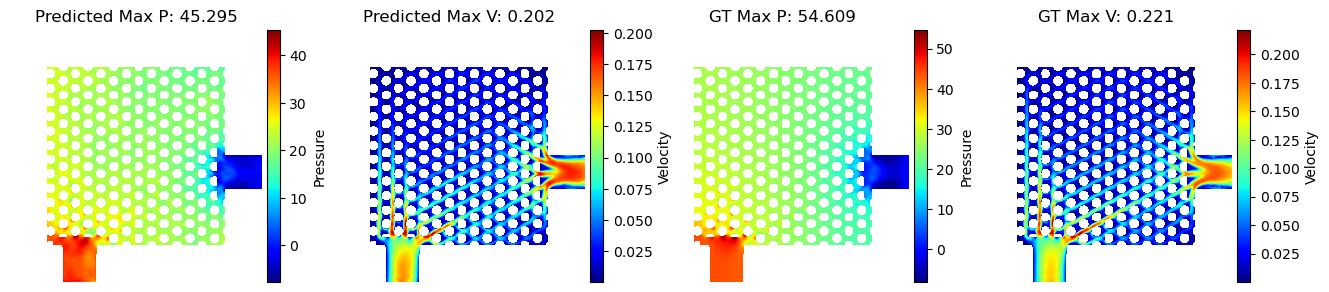

0
1000-bc_051_w_001_rn_001_inlet_top_outlet_right.npy


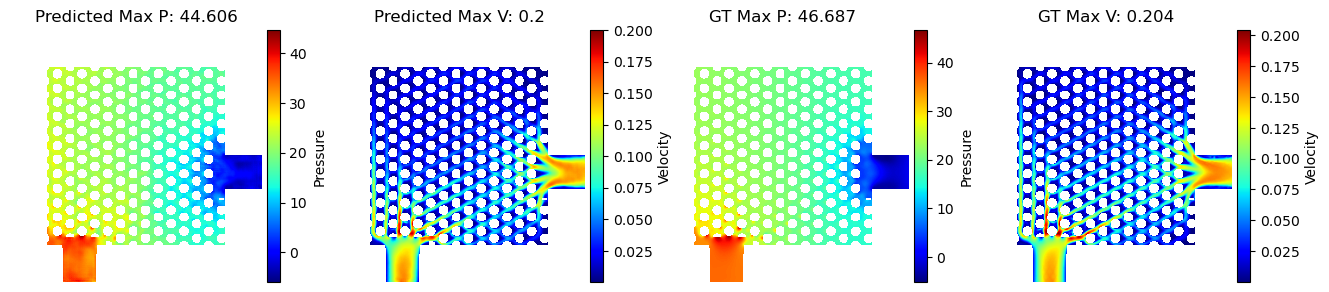

1
1000-bc_051_w_001_rn_002_inlet_top_outlet_right.npy


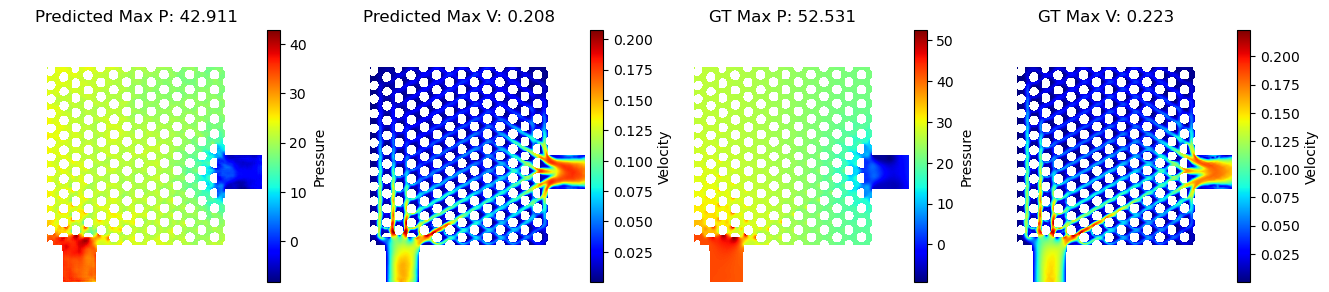

2
1000-bc_051_w_001_rn_003_inlet_top_outlet_right.npy


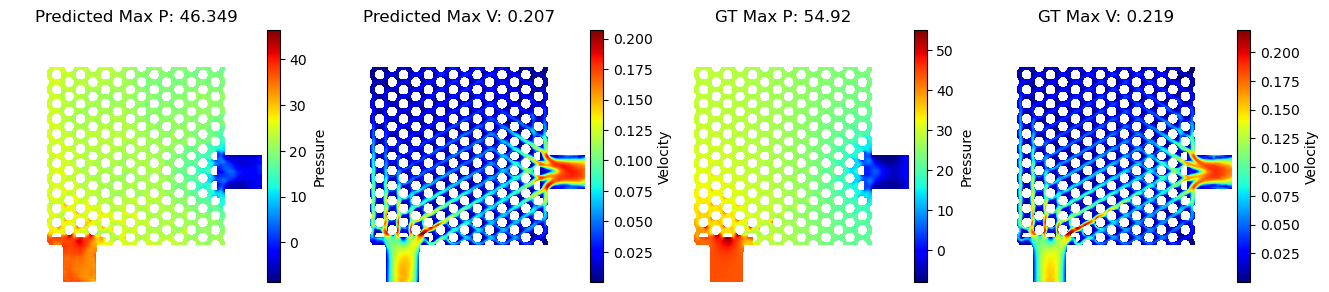

3
1000-bc_051_w_001_rn_004_inlet_top_outlet_right.npy


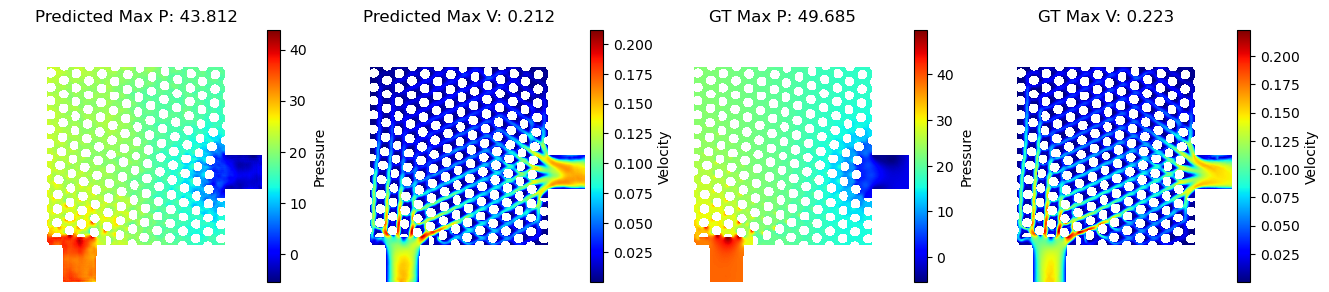

4
1000-bc_051_w_001_rn_005_inlet_top_outlet_right.npy


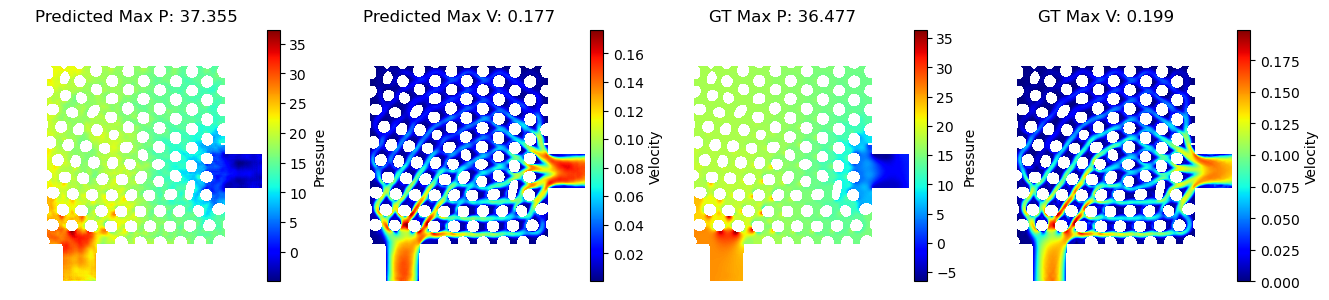

5
1000-bc_051_w_002_rn_001_inlet_top_outlet_right.npy


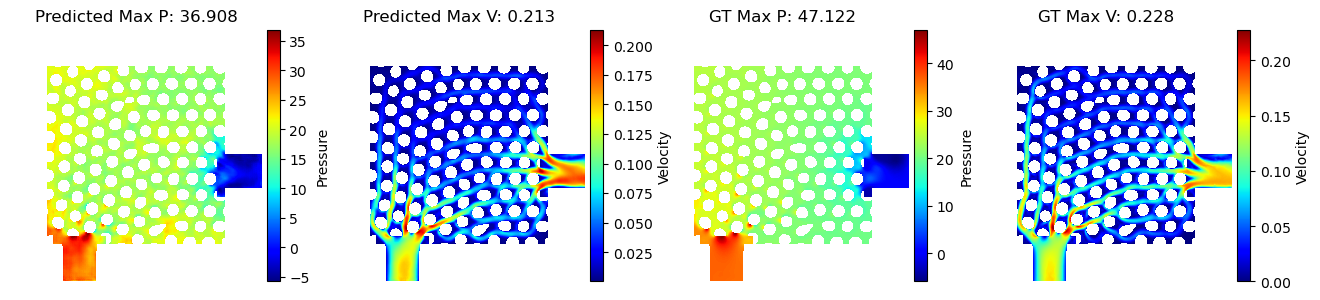

6
1000-bc_051_w_002_rn_002_inlet_top_outlet_right.npy


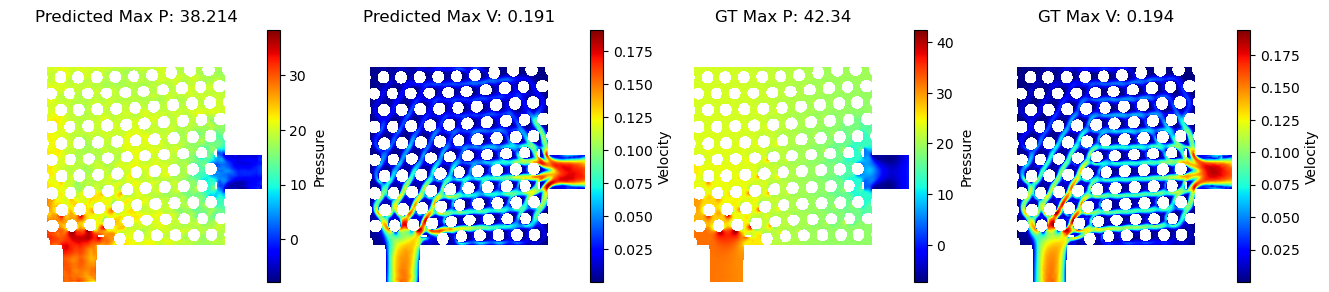

7
1000-bc_051_w_002_rn_003_inlet_top_outlet_right.npy


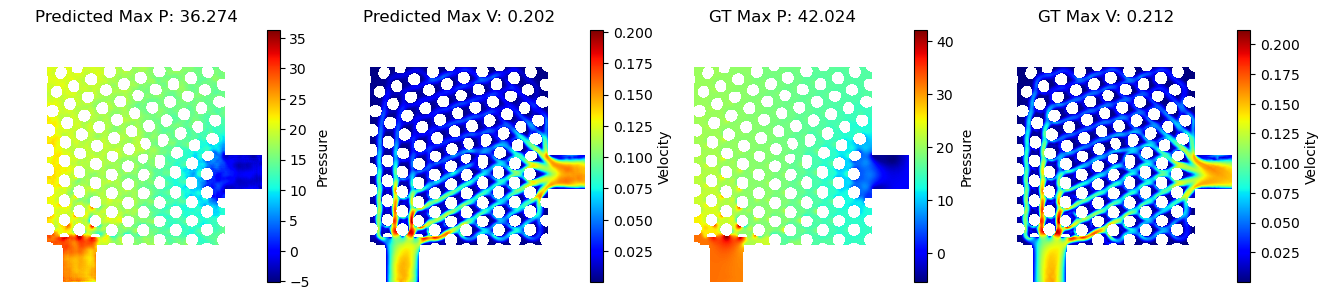

8
1000-bc_051_w_002_rn_004_inlet_top_outlet_right.npy


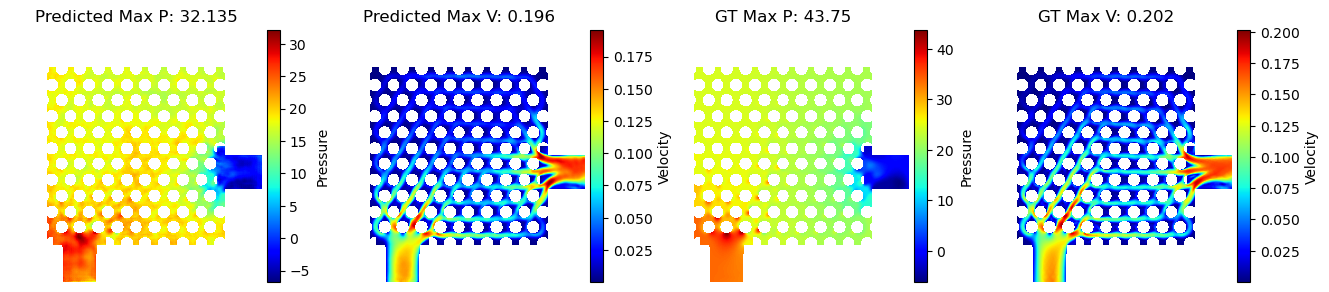

9
1000-bc_051_w_002_rn_005_inlet_top_outlet_right.npy


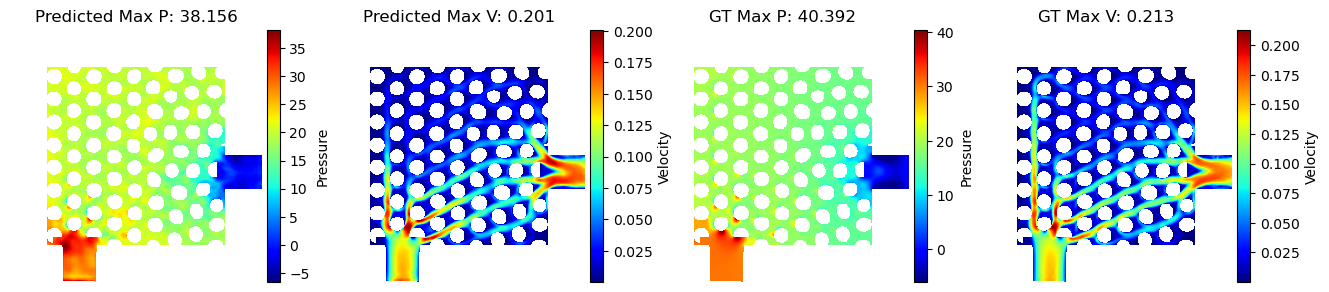

10
1000-bc_051_w_003_rn_001_inlet_top_outlet_right.npy


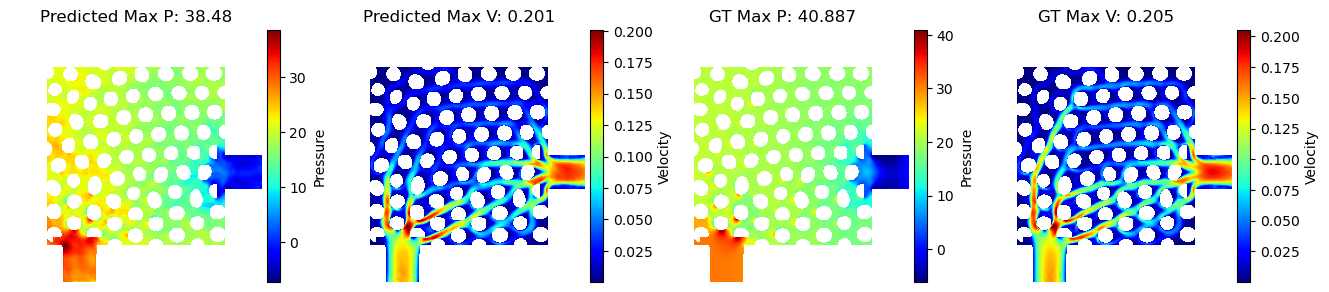

11
1000-bc_051_w_003_rn_002_inlet_top_outlet_right.npy


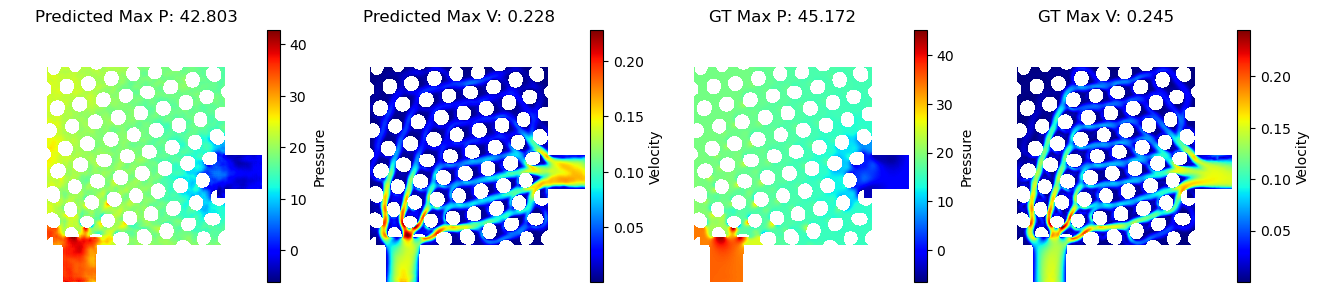

12
1000-bc_051_w_003_rn_003_inlet_top_outlet_right.npy


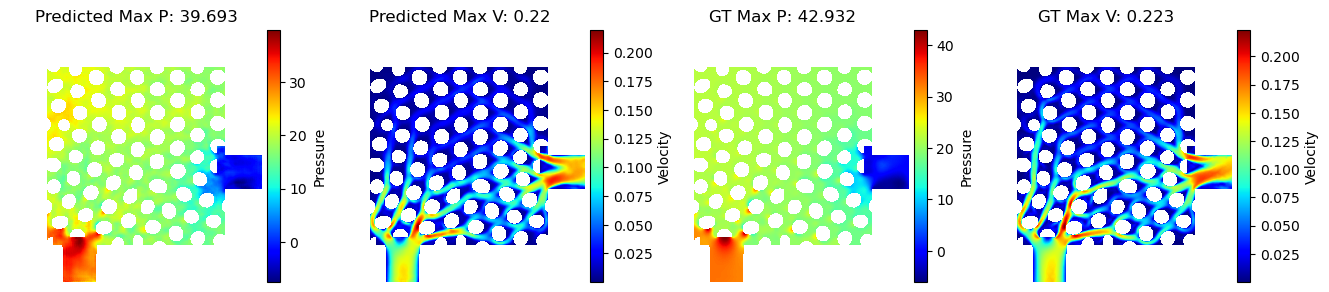

13
1000-bc_051_w_003_rn_004_inlet_top_outlet_right.npy


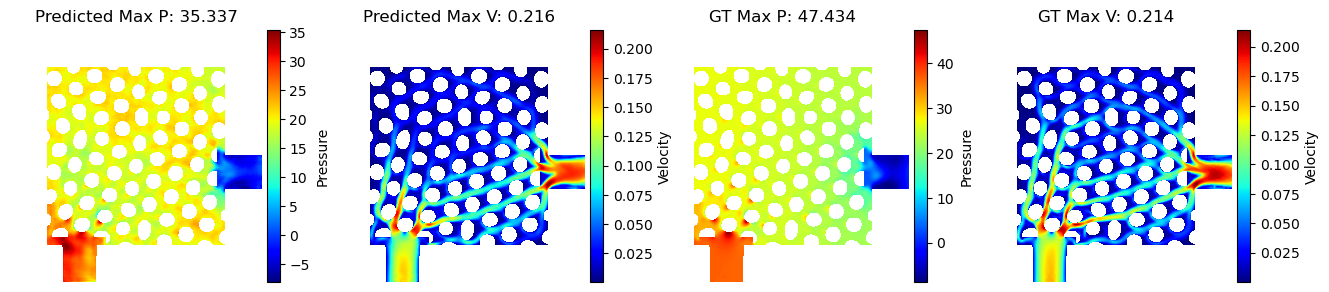

14
1000-bc_051_w_003_rn_005_inlet_top_outlet_right.npy


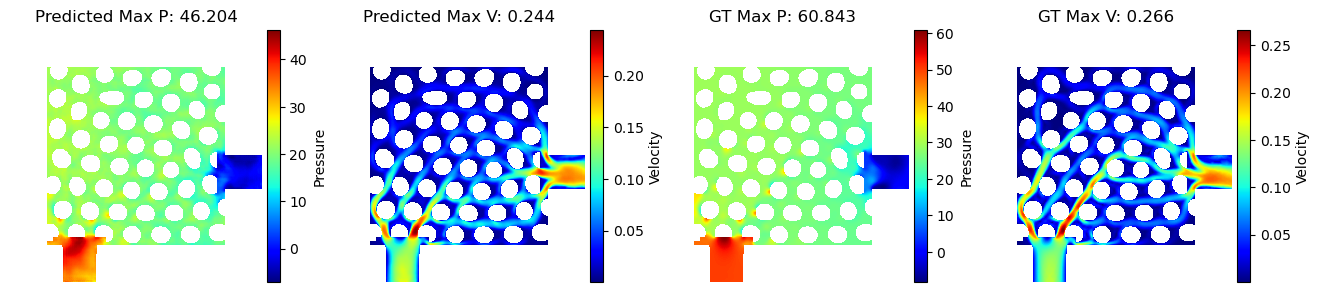

15
1000-bc_051_w_004_rn_001_inlet_top_outlet_right.npy


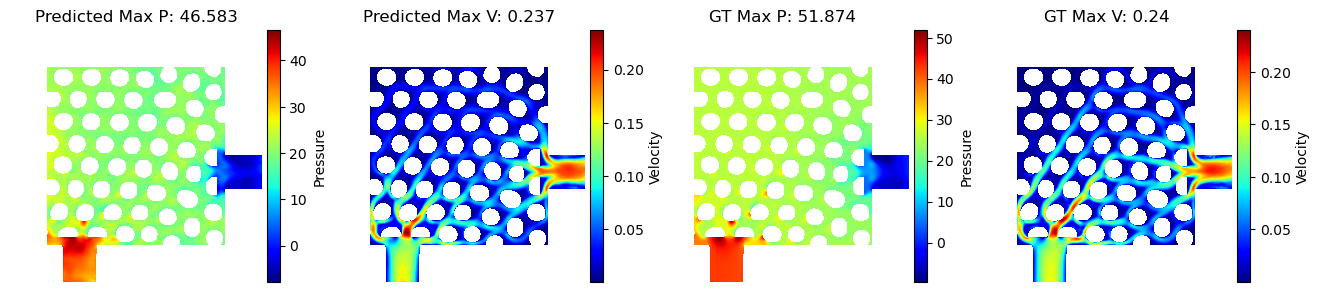

16
1000-bc_051_w_004_rn_002_inlet_top_outlet_right.npy


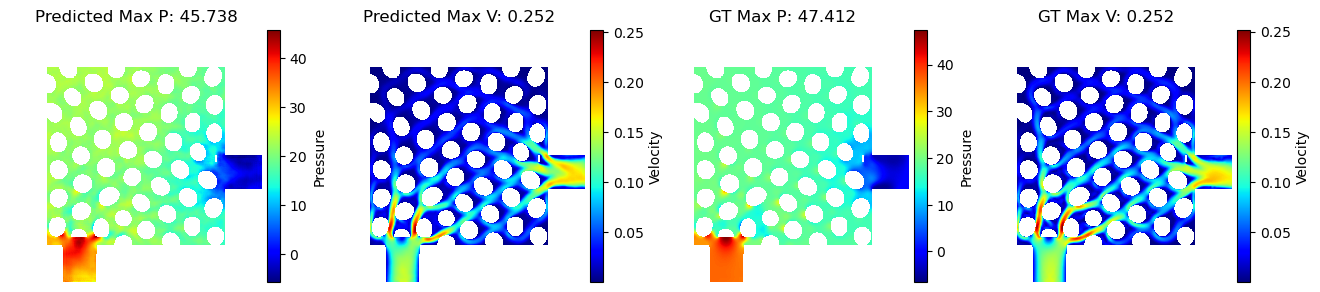

17
1000-bc_051_w_004_rn_003_inlet_top_outlet_right.npy


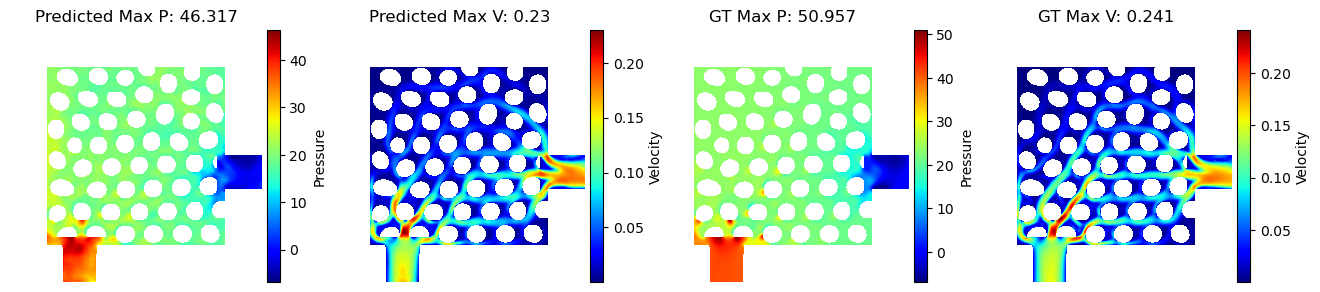

18
1000-bc_051_w_004_rn_004_inlet_top_outlet_right.npy


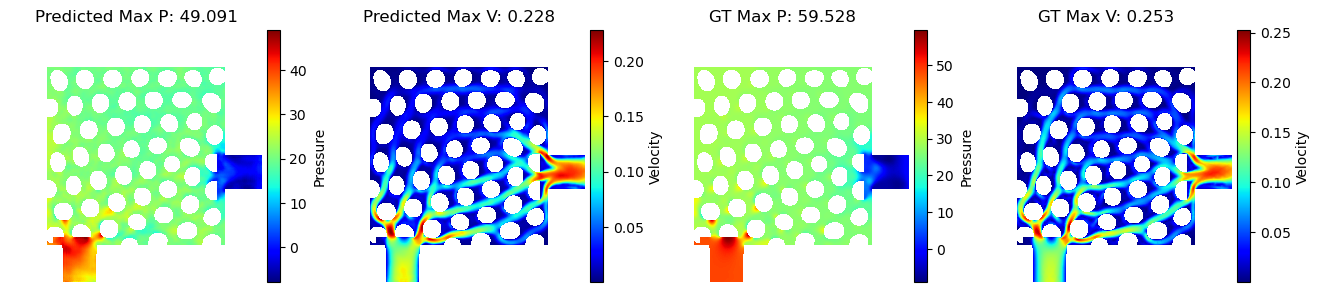

19
1000-bc_051_w_004_rn_005_inlet_top_outlet_right.npy


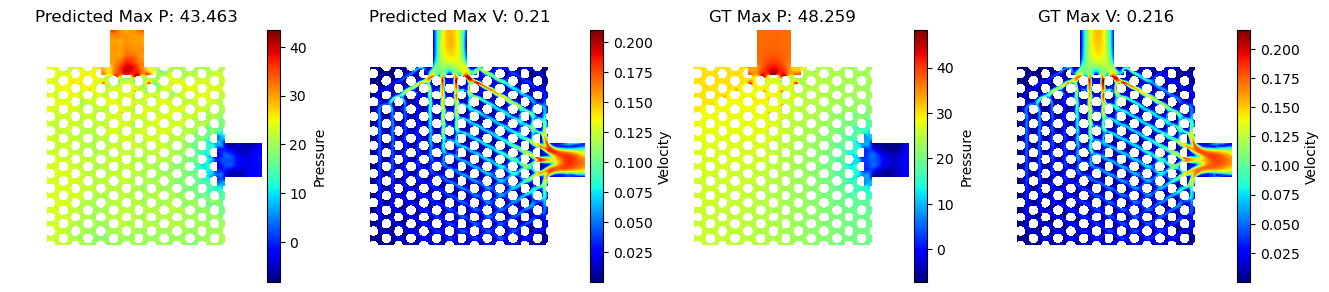

20
1000-bc_052_w_001_rn_001_inlet_bottom_outlet_right.npy


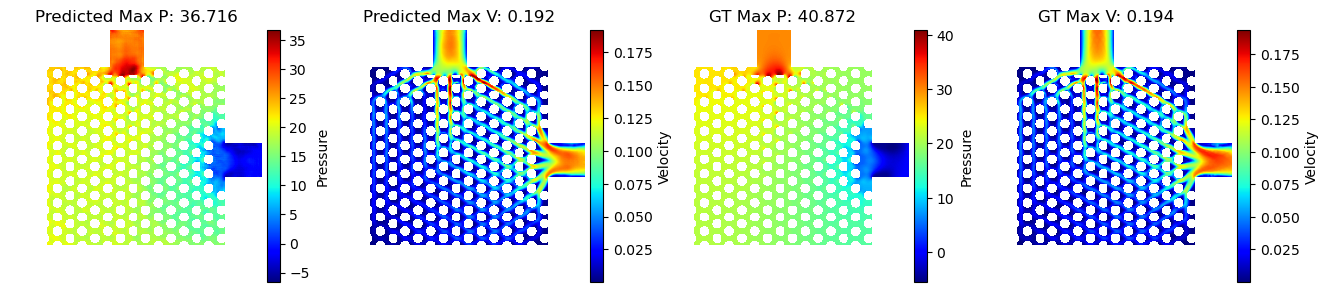

21
1000-bc_052_w_001_rn_002_inlet_bottom_outlet_right.npy


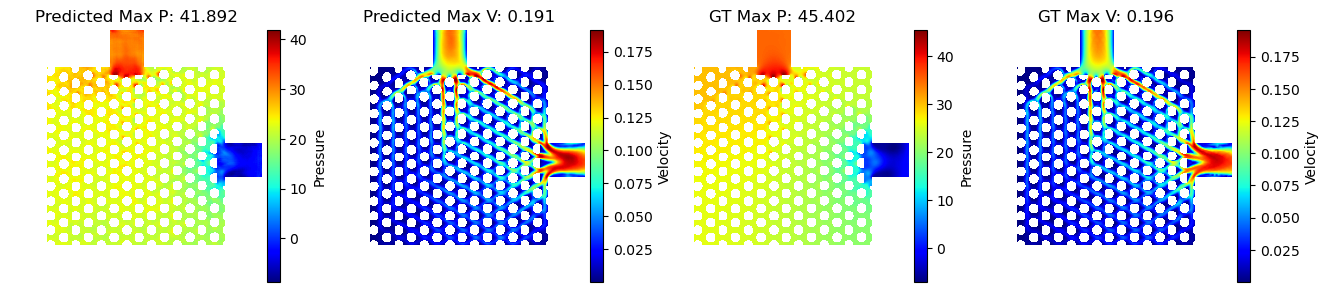

22
1000-bc_052_w_001_rn_003_inlet_bottom_outlet_right.npy


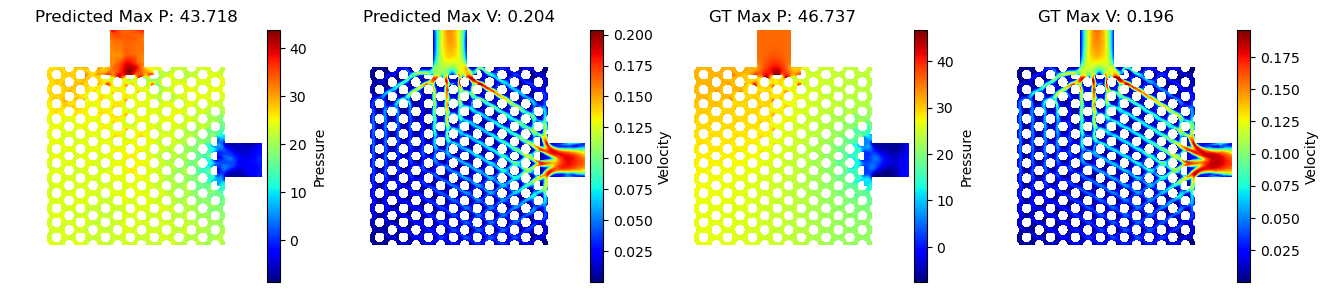

23
1000-bc_052_w_001_rn_004_inlet_bottom_outlet_right.npy


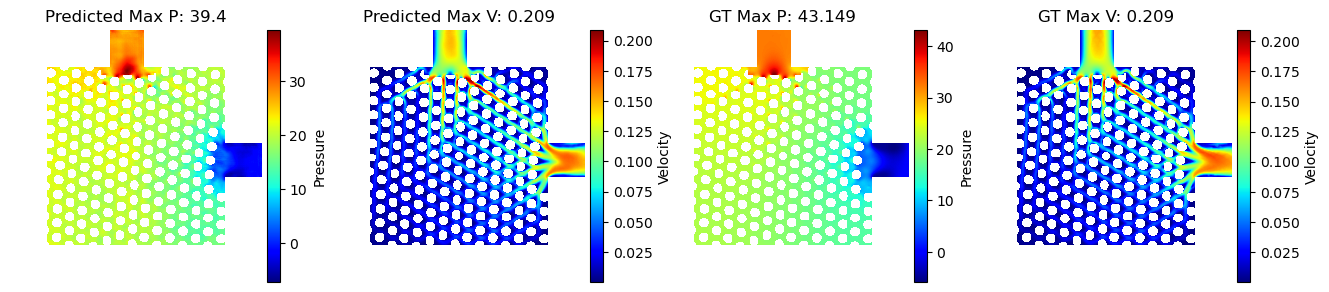

24
1000-bc_052_w_001_rn_005_inlet_bottom_outlet_right.npy


In [3]:
import matplotlib.pyplot as plt

lv2_folder = 'Validation/Low/LVV-new'
hv2_folder = 'Validation/High/HVV'
lp2_folder = 'Validation/Low/LPP-new'
hp2_folder = 'Validation/High/HPP'
lg2_folder = 'Validation/LG-3C'

# Get the list of file names in each folder
lv2_files = [f2 for f2 in os.listdir(lv2_folder) if f2 != ".ipynb_checkpoints"]
hv2_files = [f2 for f2 in os.listdir(hv2_folder) if f2 != ".ipynb_checkpoints"]
lp2_files = [f2 for f2 in os.listdir(lp2_folder) if f2 != ".ipynb_checkpoints"]
hp2_files = [f2 for f2 in os.listdir(hp2_folder) if f2 != ".ipynb_checkpoints"]
lg2_files = [f2 for f2 in os.listdir(lg2_folder) if f2 != ".ipynb_checkpoints"]

# Sort the file names to ensure the order is consistent
lv2_files.sort()
hv2_files.sort()
lp2_files.sort()
hp2_files.sort()
lg2_files.sort()



# Create empty lists to store the data
X_lv2 = []
X_lp2 = []
X_lg2 = []
Y_hv2 = []
Y_hp2 = []

# Read the data from the folders
for lv2_file, hv2_file,lp2_file,hp2_file,lg2_file in zip(lv2_files, hv2_files,lp2_files,hp2_files,lg2_files):
    try:
        
        # Read the LFV
        lv2_image = np.load(os.path.join(lv2_folder, lv2_file))  # Convert to RGB
        X_lv2.append(np.array(lv2_image))
        
        # Read the HFV
        hv2_image = np.load(os.path.join(hv2_folder, hv2_file))  # Convert to RGB
        Y_hv2.append(np.array(hv2_image))

        # Read the LFP
        lp2_image = np.load(os.path.join(lp2_folder, lp2_file))  # Convert to RGB
        X_lp2.append(np.array(lp2_image))
    
    
        # Read the channel geometry image
        lg2_image = Image.open(os.path.join(lg2_folder, lg2_file)).convert('RGB')  # Convert to RGB
        lg2_image = lg2_image.resize(input_shape[:2])  # Resize the image
        X_lg2.append(np.array(lg2_image))
    
        # Read the HFP
        hp2_image = np.load(os.path.join(hp2_folder, hp2_file))  # Convert to RGB
        Y_hp2.append(np.array(hp2_image))
    except:
        print('')

# Convert the lists to arrays
X_lv2 = np.array(X_lv2) 
X_lp2 = np.array(X_lp2) 
X_lg2 = np.array(X_lg2) / 255.0  # Normalize the channel geometry images
Y_hv2 = np.array(Y_hv2)
Y_hp2 = np.array(Y_hp2)





X_lp2 = np.nan_to_num(X_lp2, nan=0)
X_lv2 = np.nan_to_num(X_lv2, nan=0)
X_lp2=(X_lp2-np.min(X_lp2))/(np.max(X_lp2)-np.min(X_lp2))
# Predict velocity and pressure outputs
model.load_weights('Saved_Models_Temp/total-proposed-Unet-3-Inputs.h5')
pressure_output2,velocity_output2 = model.predict([X_lg2,X_lv2,X_lp2])

velocity_output2=(velocity_output2)
a=(np.max(Y_hp)-np.min(Y_hp))
b=(np.min(Y_hp))

pressure_output2=(pressure_output2*a)+b


mask = np.all(X_lg2 > 0.8, axis=-1)

# Expand mask to match the shape of array2
mask_expanded = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
Y_hp2[mask]=np.nan
Y_hv2[mask]=np.nan
velocity_output2[mask]=np.nan
pressure_output2[mask]=np.nan

from mpl_toolkits.axes_grid1 import make_axes_locatable






def plot_images(index):
    plt.figure(figsize=(16, 48))

    # Display the pressure output
    ax1 = plt.subplot(1, 4, 1)
    im1 = ax1.imshow(pressure_output2[index],cmap='jet')
    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im1, cax=cax1, label='Pressure')
    ax1.set_title('Predicted Max P: '+ str(np.round(np.nanmax(pressure_output2[index]),decimals=3)))
    ax1.axis("off")

    # Display the velocity output
    ax2 = plt.subplot(1, 4, 2)
    im2 = ax2.imshow(velocity_output2[index],cmap='jet')
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im2, cax=cax2, label='Velocity')
    ax2.set_title('Predicted Max V: '+ str(np.round(np.nanmax(velocity_output2[index]),decimals=3)))
    ax2.axis("off")

    # Display the input image (Pressure GT)
    ax3 = plt.subplot(1, 4, 3)
    im3 = ax3.imshow(Y_hp2[index],cmap='jet')
    divider3 = make_axes_locatable(ax3)
    cax3 = divider3.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im3, cax=cax3, label='Pressure')
    ax3.set_title('GT Max P: '+ str(np.round(np.nanmax(Y_hp2[index]),decimals=3)))
    ax3.axis("off")

    # Display the velocity GT
    ax4 = plt.subplot(1, 4, 4)
    im4 = ax4.imshow(Y_hv2[index],cmap='jet')
    divider4 = make_axes_locatable(ax4)
    cax4 = divider4.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im4, cax=cax4, label='Velocity')
    ax4.set_title('GT Max V: '+ str(np.round(np.nanmax(Y_hv2[index]),decimals=3)))
    ax4.axis("off")

    plt.show()

# Loop to plot images 
for i in range(0, 25):
    plot_images(i)
    print(i)
    print(lv2_files[i])

In [4]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr

Yp = np.expand_dims(Y_hp2, axis=-1)
Yv = np.expand_dims(Y_hv2, axis=-1)

expected = Yp
predicted = pressure_output2



# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)

# Print Results
print("---------------------All Results---------")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")

print("---------------------RN=1000---------")

# Dummy data (replace with actual predicted and expected arrays)
expected = Yp[0:973]
predicted = pressure_output2[0:973]



# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)

# Print Results
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")

print("---------------------RN=1500---------")

expected = Yp[974:1886]
predicted = pressure_output2[974:1886]




# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)

# Print Results
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")
    
print("---------------------RN=500---------")

expected = Yp[1887:2885]
predicted = pressure_output2[1887:2885]



# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)

# Print Results
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")


---------------------All Results---------
MSE: 123.5263
MAE: 4.6119
RMSE: 11.1142
R^2: 0.7801
NRMSE: 0.0193
SMAPE: 24.6250%
Pearson Correlation: 0.8919
PSNR: 33.3914 dB
---------------------RN=1000---------
MSE: 149.5668
MAE: 4.2421
RMSE: 12.2298
R^2: 0.3260
NRMSE: 0.0283
SMAPE: 21.9829%
Pearson Correlation: 0.6019
PSNR: 30.3107 dB
---------------------RN=1500---------
MSE: 147.0671
MAE: 8.1836
RMSE: 12.1271
R^2: 0.6905
NRMSE: 0.0211
SMAPE: 20.6132%
Pearson Correlation: 0.8529
PSNR: 32.6338 dB
---------------------RN=500---------
MSE: 76.8611
MAE: 1.7085
RMSE: 8.7670
R^2: 0.0790
NRMSE: 0.0232
SMAPE: 30.8890%
Pearson Correlation: 0.3090
PSNR: 32.0889 dB


In [5]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr


expected = Yv
predicted = velocity_output2

# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)

# Print Results
print("---------------------All Results---------")
print(f"MSE: {mse:.8f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")

print("---------------------RN=1000---------")

# Dummy data (replace with actual predicted and expected arrays)
expected = Yv[0:973]
predicted = velocity_output2[0:973]



# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)

# Print Results
print(f"MSE: {mse:.8f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")

print("---------------------RN=1500---------")

expected = Yv[974:1886]
predicted = velocity_output2[974:1886]




# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)

# Print Results
print(f"MSE: {mse:.8f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")
    
print("---------------------RN=500---------")

expected = Yv[1887:2885]
predicted = velocity_output2[1887:2885]



# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)

# Print Results
print(f"MSE: {mse:.8f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")



---------------------All Results---------
MSE: 0.00028558
MAE: 0.0089
RMSE: 0.0169
R^2: 0.9054
NRMSE: 0.0185
SMAPE: 40.7415%
Pearson Correlation: 0.9516
PSNR: 34.6437 dB
---------------------RN=1000---------
MSE: 0.00023301
MAE: 0.0088
RMSE: 0.0153
R^2: 0.9020
NRMSE: 0.0188
SMAPE: 40.0517%
Pearson Correlation: 0.9499
PSNR: 34.5393 dB
---------------------RN=1500---------
MSE: 0.00059168
MAE: 0.0143
RMSE: 0.0243
R^2: 0.8887
NRMSE: 0.0267
SMAPE: 41.8782%
Pearson Correlation: 0.9430
PSNR: 31.4800 dB
---------------------RN=500---------
MSE: 0.00005594
MAE: 0.0042
RMSE: 0.0075
R^2: 0.9061
NRMSE: 0.0120
SMAPE: 40.3658%
Pearson Correlation: 0.9519
PSNR: 38.3949 dB


In [12]:
path1="Results_Temp/Mixed/Proposed"
os.makedirs(path1, exist_ok=True)
np.save(path1+"/velocity_predicted.npy",velocity_output2)
np.save(path1+"/pressure_predicted.npy",pressure_output2)


In [7]:
# Filtered list to store filenames that meet the conditions
filtered_file_names = []
ind = []

# Iterate through the list of file names
c = 0
for file_name in lv2_files:
    if file_name.startswith("1000"):  # Check if it starts with '1000'
        # Correct the condition for checking substrings
        if (
            "inlet_left_outlet_left" in file_name or
            "inlet_right_outlet_right" in file_name or
            "inlet_bottom_outlet_bottom" in file_name or
            "inlet_top_outlet_top" in file_name
        ):
            filtered_file_names.append(file_name)
            ind.append(c)
    c += 1

# Print the filtered list of filenames
print("Filtered File Names:")
for file in filtered_file_names:
    print(file)

# Print the indices of the filtered filenames
print(ind)

# Save the indices to a numpy file
np.save("top-top.npy", ind)

Filtered File Names:
1000-bc_059_w_001_rn_001_inlet_top_outlet_top.npy
1000-bc_059_w_001_rn_002_inlet_top_outlet_top.npy
1000-bc_059_w_001_rn_003_inlet_top_outlet_top.npy
1000-bc_059_w_001_rn_004_inlet_top_outlet_top.npy
1000-bc_059_w_001_rn_005_inlet_top_outlet_top.npy
1000-bc_059_w_002_rn_001_inlet_top_outlet_top.npy
1000-bc_059_w_002_rn_002_inlet_top_outlet_top.npy
1000-bc_059_w_002_rn_003_inlet_top_outlet_top.npy
1000-bc_059_w_002_rn_004_inlet_top_outlet_top.npy
1000-bc_059_w_002_rn_005_inlet_top_outlet_top.npy
1000-bc_059_w_003_rn_001_inlet_top_outlet_top.npy
1000-bc_059_w_003_rn_002_inlet_top_outlet_top.npy
1000-bc_059_w_003_rn_003_inlet_top_outlet_top.npy
1000-bc_059_w_003_rn_004_inlet_top_outlet_top.npy
1000-bc_059_w_003_rn_005_inlet_top_outlet_top.npy
1000-bc_059_w_004_rn_001_inlet_top_outlet_top.npy
1000-bc_059_w_004_rn_003_inlet_top_outlet_top.npy
1000-bc_059_w_004_rn_004_inlet_top_outlet_top.npy
1000-bc_061_w_001_rn_001_inlet_left_outlet_left.npy
1000-bc_061_w_001_rn_002_in

In [19]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr

inds1=np.load("Flow-Configurations/top-top.npy")
# Dummy data (replace with actual predicted and expected arrays)
expected = Yp[inds1]
predicted = pressure_output2[inds1]



# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)

# Print Results
print("---------------------Same-Side-In-Out---------")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")


inds2=np.load("Flow-Configurations/top-bottom.npy")
# Dummy data (replace with actual predicted and expected arrays)
expected = Yp[inds2]
predicted = pressure_output2[inds2]



# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)

# Print Results
print("---------------------Top-Bottom---------")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")




inds3=np.load("Flow-Configurations/top-right.npy")
# Dummy data (replace with actual predicted and expected arrays)
expected = Yp[inds3]
predicted = pressure_output2[inds3]



# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)






# Print Results
print("---------------------Top-Right---------")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")




inds5=np.load("Flow-Configurations/top-left.npy")
# Dummy data (replace with actual predicted and expected arrays)
expected = Yp[inds5]
predicted = pressure_output2[inds5]



# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)






# Print Results
print("---------------------Top-Left---------")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")





inds4=np.load("Flow-Configurations/left-right.npy")
# Dummy data (replace with actual predicted and expected arrays)
expected = Yp[inds4]
predicted = pressure_output2[inds4]



# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)

# Print Results
print("---------------------left-right---------")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")

---------------------Same-Side-In-Out---------
MSE: 40.3959
MAE: 4.3984
RMSE: 6.3558
R^2: 0.5728
NRMSE: 0.0454
SMAPE: 25.0987%
Pearson Correlation: 0.8149
PSNR: 25.1643 dB
---------------------Top-Bottom---------
MSE: 10.7298
MAE: 2.5075
RMSE: 3.2756
R^2: 0.8583
NRMSE: 0.0460
SMAPE: 16.8443%
Pearson Correlation: 0.9369
PSNR: 25.2174 dB
---------------------Top-Right---------
MSE: 369.1893
MAE: 4.4999
RMSE: 19.2143
R^2: 0.1685
NRMSE: 0.0445
SMAPE: 20.5717%
Pearson Correlation: 0.4406
PSNR: 26.3865 dB
---------------------Top-Left---------
MSE: 35.3053
MAE: 4.1226
RMSE: 5.9418
R^2: 0.7012
NRMSE: 0.0613
SMAPE: 21.7588%
Pearson Correlation: 0.8669
PSNR: 22.8598 dB
---------------------left-right---------
MSE: 27.2517
MAE: 3.7103
RMSE: 5.2203
R^2: 0.7699
NRMSE: 0.0632
SMAPE: 19.3162%
Pearson Correlation: 0.9039
PSNR: 22.4134 dB


In [24]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr

inds1=np.load("Flow-Configurations/top-top.npy")
# Dummy data (replace with actual predicted and expected arrays)
expected = Yv[inds1]
predicted = velocity_output2[inds1]



# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)

# Print Results
print("---------------------Same-Side-In-Out---------")
print(f"MSE: {mse:.8f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")


inds2=np.load("Flow-Configurations/top-bottom.npy")
# Dummy data (replace with actual predicted and expected arrays)
expected = Yv[inds2]
predicted = velocity_output2[inds2]



# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)

# Print Results
print("---------------------Top-Bottom---------")
print(f"MSE: {mse:.8f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")




inds3=np.load("Flow-Configurations/top-right.npy")
# Dummy data (replace with actual predicted and expected arrays)
expected = Yv[inds3]
predicted = velocity_output2[inds3]



# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)






# Print Results
print("---------------------Top-Right---------")
print(f"MSE: {mse:.8f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")




inds5=np.load("Flow-Configurations/top-left.npy")
# Dummy data (replace with actual predicted and expected arrays)
expected = Yv[inds5]
predicted = velocity_output2[inds5]



# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)






# Print Results
print("---------------------Top-Left---------")
print(f"MSE: {mse:.8f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")





inds4=np.load("Flow-Configurations/left-right.npy")
# Dummy data (replace with actual predicted and expected arrays)
expected = Yv[inds4]
predicted = velocity_output2[inds4]



# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)

# Print Results
print("---------------------left-right---------")
print(f"MSE: {mse:.8f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")

---------------------Same-Side-In-Out---------
MSE: 0.00025842
MAE: 0.0087
RMSE: 0.0161
R^2: 0.8917
NRMSE: 0.0344
SMAPE: 44.9793%
Pearson Correlation: 0.9450
PSNR: 29.2732 dB
---------------------Top-Bottom---------
MSE: 0.00014339
MAE: 0.0076
RMSE: 0.0120
R^2: 0.9361
NRMSE: 0.0469
SMAPE: 31.8775%
Pearson Correlation: 0.9676
PSNR: 26.5838 dB
---------------------Top-Right---------
MSE: 0.00021705
MAE: 0.0085
RMSE: 0.0147
R^2: 0.9077
NRMSE: 0.0181
SMAPE: 37.9711%
Pearson Correlation: 0.9530
PSNR: 34.8475 dB
---------------------Top-Left---------
MSE: 0.00022983
MAE: 0.0091
RMSE: 0.0152
R^2: 0.9038
NRMSE: 0.0486
SMAPE: 39.5603%
Pearson Correlation: 0.9510
PSNR: 26.2698 dB
---------------------left-right---------
MSE: 0.00026000
MAE: 0.0102
RMSE: 0.0161
R^2: 0.8859
NRMSE: 0.0596
SMAPE: 35.7578%
Pearson Correlation: 0.9417
PSNR: 24.4890 dB
